In [51]:
import pandas as pd
import re
from imdb import IMDb
ia = IMDb()

In [52]:
all_movies_genres = pd.read_excel('Genre Data.xlsx')
print(all_movies_genres.shape)
print(all_movies_genres['Title'].nunique())

(3162, 100)
3151


In [53]:
exception_clauses = all_movies_genres.loc[all_movies_genres['Genres'] == 'Exception Clause']
all_movies_genres_without_exception = all_movies_genres.loc[all_movies_genres['Genres'] != 'Exception Clause']
def get_first_match_genre(movie_title):
    print(movie_title)
    try:
        movies_found = ia.search_movie(movie_title)
        movie_found = movies_found[0]
        movie = ia.get_movie(movie_found.movieID)
        return pd.Series((movie['genres'], movie['year']))
    except:
        return pd.Series(('Exception Clause', 'Exception Clause'))
    
exception_clauses['Title'] = exception_clauses['Title'].apply(lambda x: x.replace('&#039;',"'"))
exception_clauses['Title'] = exception_clauses['Title'].apply(lambda x: x.replace('&amp;',"&"))
exception_clauses[['Genres','IMDB Year']] = exception_clauses.apply(lambda row: get_first_match_genre(row['Title']), axis = 1)


Hunted, The


/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Hunted, The
Jungle Book 2
Windtalkers
Finding Nemo
Spider-Man
Desperado II: Once Upon a Time in Mexico
Benchwarmers
AVPR: Alien vs Predator - Requiem
Good Night and Good Luck
27 Dresses
Green Zone
Piranha 3D
Harry Potter and the Deathly Hallows: Part 1
Thor: The Dark World
Julie & Julia
King's Speech, The
Mao's Last Dancer
Emperor
Jack Ryan: Shadow Recruit
Witch, The
Your Name
Nobody's Fool
Love & Mercy
Zookeeper's Wife, The
Molly's Game
I'm Not Ashamed
Elvis & Nixon
Viceroy's House
Old Man & the Gun
Dog's Way Home, A
Isn't It Romantic
Dog's Journey, A
Dead Don't Die, The
Child's Play


/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [54]:
exception_clauses_solved = exception_clauses.loc[exception_clauses['Genres'] != 'Exception Clause']
all_movies_genres = pd.concat([all_movies_genres_without_exception, exception_clauses_solved])
print(all_movies_genres.shape)
print(all_movies_genres['Title'].nunique())


(3153, 100)
3142


In [55]:
exception_clauses_remaining = exception_clauses.loc[exception_clauses['Genres'] == 'Exception Clause']
len(exception_clauses_remaining) # 3151 - 3142

9

In [58]:
years_do_not_match = all_movies_genres.loc[all_movies_genres['Year'] != all_movies_genres['IMDB Year']]
years_match = all_movies_genres.loc[all_movies_genres['Year'] == all_movies_genres['IMDB Year']]
years_do_not_match['Difference'] = abs(years_do_not_match['Year'] - years_do_not_match['IMDB Year'])
one_year_difference = years_do_not_match.loc[years_do_not_match['Difference'] == 1]
one_year_difference['Year'] = one_year_difference['IMDB Year']
del one_year_difference['Difference']
print(years_match.shape)
years_match = pd.concat([years_match, one_year_difference])
years_do_not_match = years_do_not_match.loc[years_do_not_match['Difference'] >1]


print(years_do_not_match.shape)
print(years_match.shape)

(2533, 100)
(290, 101)
(2863, 100)


/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [18]:
count = 0
def get_genre_byyear(movie_title, year):
    global count 
    count += 1
    print(count, movie_title)
    try:
        movies_found = ia.search_movie(movie_title)
        years = re.findall("\(\d{4}\)_>", str(movies_found))
        years = re.findall('\d{4}', str(years))
        matching_index = [index for index,value in enumerate(years) if value == str(row['Year'])]
        movie_found = movies_found[matching_index[0]]
        movie = ia.get_movie(movie_found.movieID)
        return movie['genres']
    except:
        return 'Exception Clause'

years_not_match = all_movies_genres.loc[all_movies_genres['Year'] != all_movies_genres['IMDB Year']]
years_match = all_movies_genres.loc[all_movies_genres['Year'] == all_movies_genres['IMDB Year']]

years_not_match['Difference'] = abs(years_not_match['Year'] - years_not_match['IMDB Year'])
one_year_difference = years_not_match.loc[years_not_match['Year'] == 1]
one_year_difference['Year'] = one_year_difference['IMDB Year']

years_match = pd.concat([years_match, one_year_difference])

years_not_match = years_not_match.loc[years_not_match['Difference'] >1]
print(len(years_not_match))


years_not_match['Genre'] = years_not_match.apply(lambda row: get_genre_byyear(row['Title'], row['Year']), axis =1)
    
years_not_match
    
    

/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



290
1 Empire
2 Solaris
3 Transporter, The
4 Trapped
5 Bad Company
6 Good Girl, The
7 Daredevil
8 In-Laws, The
9 Spy Kids 3D: Game Over
10 S.W.A.T.
11 Order, The
12 Texas Chainsaw Massacre, The
13 Missing, The
14 Twisted
15 Starsky and Hutch
16 Hellboy
17 Punisher, The
18 Van Helsing
19 Around the World in 80 Days
20 Terminal, The
21 King Arthur
22 Yu-Gi-Oh!
23 Hero
24 Forgotten, The
25 Taxi
26 Grudge, The
27 Incredibles, The
28 Lemony Snicket's A Series of Unfortunate Events
29 Darkness
30 Big Trouble
31 40 Days & 40 Nights
32 Rollerball
33 Showtime
34 E.T.
35 Assault on Precinct 13
36 Boogeyman
37 Cursed
38 Jacket, The
39 Kicking and Screaming
40 Honeymooners, The
41 High Tension
42 Bewitched
43 Rebound
44 Fantastic Four
45 Island, The
46 Red-Eye
47 Man, The
48 Serenity
49 Fog, The
50 In the Mix
51 Ringer, The
52 Matador, The
53 Wild, The
54 Omen, The
55 Miami Vice
56 Wicker Man, The
57 Protector, The
58 Covenant, The
59 Guardian, The
60 Return, The
61 Turistas
62 Holiday, The
63 Hitc

,Title,Release date,Year,Data set,Minutes,Production,Distributor,MPAA rating,MPAA descriptor,Descriptor text,...,Smokeless,E-cigs,Total incidents,Incident range,Tickets sold,Tobacco impressions,Genres,IMDB Year,Difference,Genre
0,Empire,17 Dec 2002,2002,T10,90.0,Universal,Comcast,R,0,NaN,...,0,NaN,70,50+,3018034,211262380,"['Drama', 'Music']",2015,13,"[Crime, Drama, Thriller]"
14,Solaris,30 Nov 2002,2002,T10,99.0,Fox,Fox,PG-13,0,NaN,...,0,NaN,0,0,2581618,0,"['Drama', 'Mystery', 'Sci-Fi']",1972,30,"[Drama, Mystery, Romance, Sci-Fi]"
21,"Transporter, The",11 Oct 2002,2002,T10,94.0,EuropaCorp,Fox,PG-13,0,NaN,...,0,NaN,23,10-29,4361456,100313488,"['Action', 'Thriller']",2005,3,"[Action, Crime, Thriller]"
22,Trapped,20 Sep 2002,2002,T10,105.0,Sony,Sony,R,0,NaN,...,0,NaN,0,0,1192564,0,"['Crime', 'Drama', 'Thriller']",2015,13,"[Action, Crime, Drama, Thriller]"
36,Bad Company,07 Jun 2002,2002,T10,116.0,Bruckheimer,Disney,PG-13,0,NaN,...,0,NaN,24,10-29,5199486,124787664,"['Horror', 'Thriller']",1972,30,"[Action, Adventure, Comedy, Thriller]"
43,"Good Girl, The",07 Aug 2002,2002,T10,93.0,Flan de Coco,Fox,R,0,NaN,...,0,NaN,5,1-9,2416515,12082575,"['Comedy', 'Crime', 'Drama']",2018,16,"[Drama, Romance]"
72,Daredevil,03 Feb 2003,2003,T10,103.0,Regency,Fox,PG-13,0,NaN,...,0,NaN,36,30-49,17005559,612200124,"['Action', 'Crime', 'Drama', 'Fantasy', 'Sci-F...",2015,12,Exception Clause
98,"In-Laws, The",23 May 2003,2003,T10,95.0,Gerber,Time Warner,PG-13,0,NaN,...,0,NaN,5,1-9,3389822,16949110,"['Crime', 'Drama', 'Mystery', 'Thriller']",1990,13,"[Comedy, Romance]"
166,Spy Kids 3D: Game Over,25 Jul 2003,2003,T10,89.0,Miramax,Miramax,PG,0,NaN,...,0,NaN,0,0,18534101,0,['Comedy'],2016,13,Exception Clause
171,S.W.A.T.,08 Aug 2003,2003,T10,117.0,Sony,Sony,PG-13,0,NaN,...,1,NaN,14,10-29,19343838,270813732,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr...",2017,14,Exception Clause


In [33]:
unmapped_movies = years_not_match.copy()


(290, 102)
(290, 102)


In [73]:
years_not_match['Genres'] = years_not_match['Genre']
del years_not_match['Difference'], years_not_match['Genre']
years_not_match

,Title,Release date,Year,Data set,Minutes,Production,Distributor,MPAA rating,MPAA descriptor,Descriptor text,...,Cigars,Pipes,Smokeless,E-cigs,Total incidents,Incident range,Tickets sold,Tobacco impressions,Genres,IMDB Year
0,Empire,17 Dec 2002,2002,T10,90.0,Universal,Comcast,R,0,NaN,...,13,0,0,NaN,70,50+,3018034,211262380,"[Crime, Drama, Thriller]",2015
14,Solaris,30 Nov 2002,2002,T10,99.0,Fox,Fox,PG-13,0,NaN,...,0,0,0,NaN,0,0,2581618,0,"[Drama, Mystery, Romance, Sci-Fi]",1972
21,"Transporter, The",11 Oct 2002,2002,T10,94.0,EuropaCorp,Fox,PG-13,0,NaN,...,0,0,0,NaN,23,10-29,4361456,100313488,"[Action, Crime, Thriller]",2005
22,Trapped,20 Sep 2002,2002,T10,105.0,Sony,Sony,R,0,NaN,...,0,0,0,NaN,0,0,1192564,0,"[Action, Crime, Drama, Thriller]",2015
36,Bad Company,07 Jun 2002,2002,T10,116.0,Bruckheimer,Disney,PG-13,0,NaN,...,5,0,0,NaN,24,10-29,5199486,124787664,"[Action, Adventure, Comedy, Thriller]",1972
43,"Good Girl, The",07 Aug 2002,2002,T10,93.0,Flan de Coco,Fox,R,0,NaN,...,0,0,0,NaN,5,1-9,2416515,12082575,"[Drama, Romance]",2018
72,Daredevil,03 Feb 2003,2003,T10,103.0,Regency,Fox,PG-13,0,NaN,...,23,0,0,NaN,36,30-49,17005559,612200124,Exception Clause,2015
98,"In-Laws, The",23 May 2003,2003,T10,95.0,Gerber,Time Warner,PG-13,0,NaN,...,0,0,0,NaN,5,1-9,3389822,16949110,"[Comedy, Romance]",1990
166,Spy Kids 3D: Game Over,25 Jul 2003,2003,T10,89.0,Miramax,Miramax,PG,0,NaN,...,0,0,0,NaN,0,0,18534101,0,Exception Clause,2016
171,S.W.A.T.,08 Aug 2003,2003,T10,117.0,Sony,Sony,PG-13,0,NaN,...,0,0,1,NaN,14,10-29,19343838,270813732,Exception Clause,2017


In [74]:
all_movies_genres = pd.concat([years_match, years_not_match], sort = False)

In [75]:
print(all_movies_genres.shape)
print(all_movies_genres['Title'].nunique())

(3153, 100)
3142


In [165]:
all_movies_genres.columns

Index(['Title', 'Release date', 'Year', 'Data set', 'Minutes', 'Production',
       'Distributor', 'MPAA rating', 'MPAA descriptor', 'Descriptor text',
       'Production budget', 'Domestic BO', 'BO status', 'Ticket avg',
       'Documentary', 'Animated', 'Any tobacco', 'Any actual person',
       'Prime location 1', 'State 1', 'Province 1', 'Prime location 2',
       'State 2', 'Province 2', 'Director1', 'Director2', 'Director3',
       'Director4', 'Producer1', 'Producer2', 'Producer3', 'Producer4',
       'Writer1', 'Writer2', 'Writer3', 'Writer4', 'Editor1', 'Editor2',
       'Editor3', 'Editor4', 'Actor 1', 'Status', 'Tobacco product',
       'Apparent age', 'Actor 2', 'Status 2', 'Tobacco product 2',
       'Apparent age 2', 'Actor 3', 'Status 3', 'Tobacco product 3',
       'Apparent age 3', 'Actor 4', 'Status 4', 'Tobacco product 4',
       'Apparent age 4', 'Actor 5', 'Status 5', 'Tobacco product 5',
       'Apparent age 5', 'Actor 6', 'Status 6', 'Tobacco product 6',
       '

In [77]:
all_movies_genres.to_excel('All Movies Genres.xlsx', index = False)

In [164]:
black_panther = ia.get_movie('1825683', info='keywords')
print(black_panther['keywords'])

['marvel-cinematic-universe', 'marvel-comics', 'based-on-comic-book', 'king', 'african-king', 'fictional-african-country', 'superhero', 'africa', 'black-panther-character', 'action-hero', 'revenge', 'love-interest', 'super-villain', 'loss-of-arm', 'african-tribe', 'friendship', 'usurper', 'chase', 'technology', 'warrior', 'hologram', 'vibranium', 'kicked-in-the-stomach', 'fight-to-the-death', 'spear', 'geopolitics', 'isolationism', 'tribal-leader', 'heir-to-throne', 'kingdom', 'ritual', 'thrown-from-height', 'hero', 'laboratory', 'female-scientist', 'bare-chested-male', 'bilingualism', 'spy', 'casino', 'war-veteran', 'overturning-car', 'rhinoceros', 'father-son-relationship', "coup-d'etat", 'back-from-the-dead', 'loss-of-father', 'prosthetic-arm', 'museum', 'british-actor-playing-american-character', 'cia', 'cia-agent', 'african', 'tragic-villain', 'money-falling-through-the-air', 'younger-version-of-character', 'hooton-plan', 're-education', 'new-world-order', 'nwo', 'propaganda', 'ad

In [158]:
avg_incidents_per_genre_per_year = pd.read_excel('Avg Incidents Per Year Per Genre.xlsx')
# avg_incidents_per_genre_per_year 

In [159]:
x = list(avg_incidents_per_genre_per_year.columns)
x = [w.lstrip() for w in x]
avg_incidents_per_genre_per_year.columns = x
avg_incidents_per_genre_per_year
x = list(avg_incidents_per_genre_per_year.columns)[1:]

In [160]:
avg_incidents_per_genre_per_year= pd.melt(avg_incidents_per_genre_per_year, value_vars = x, id_vars = ['Year'])
avg_incidents_per_genre_per_year['value'] = avg_incidents_per_genre_per_year['value']/5

In [139]:
# avg_incidents_per_genre_per_year.to_csv('Unpivoted Incidents Per Genre, Year.csv', index = False)

In [161]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(avg_incidents_per_genre_per_year)

p = figure(x_range = list(avg_incidents_per_genre_per_year['variable'].unique()), plot_width = 1000)
p.circle(x='variable', y='Year', size = 'value', source=source, color='green')
p.axis.major_label_text_font_size = "6pt"

show(p)

Loading BokehJS ...

In [175]:
required_data = all_movies_genres[(all_movies_genres['Data set'] == 'T10') & (all_movies_genres['Prime location 1'] == 'US')
                                  & (all_movies_genres['Any tobacco'] == 1)]

print(required_data.shape)
count = 0
def get_keywords(movie_title):
    global count 
    print(count, movie_title)
    count += 1
    try:
        movies_found = ia.search_movie(movie_title)
        movie_found = movies_found[0]
        movie = ia.get_movie(movie_found.movieID, info = 'keywords')
        return movie['keywords']
    except:
        return 'Exception Clause'
    
# exception_clauses['Title'] = exception_clauses['Title'].apply(lambda x: x.replace('&#039;',"'"))
# exception_clauses['Title'] = exception_clauses['Title'].apply(lambda x: x.replace('&amp;',"&"))
required_data['Keywords'] = required_data['Title'].apply(get_keywords)


(860, 100)
0 Friday After Next
1 Gangs of New York
2 Road to Perdition
3 Serving Sarah
4 Signs
5 S1m0ne
6 Swimfan
7 Treasure Planet
8 Tuck Everlasting
9 View From the Top
10 White Oleander
11 xXx
12 Chicago
13 Core, The
14 Cradle 2 the Grave
15 Head of State
16 Holes
17 Hot Chick, The
18 House of 1000 Corpses
19 Jackass: The Movie
20 Just Married
21 Life of David Gale, The
22 Stealing Harvard
23 Daddy Day Care
24 Changing Lanes
25 Drumline
26 Eight Crazy Nights
27 Maid in Manhattan
28 Man Apart, A
29 Master of Disguise, The
30 Men in Black 2
31 Minority Report
32 Moonlight Mile
33 Mr. Deeds
34 Old School
35 It Runs In the Family
36 Confidence
37 Identity
38 Down With Love
39 Dumb and Dumberer: When Harry Met Lloyd
40 Hollywood Homicide
41 2 Fast 2 Furious
42 Italian Job, The
43 Alex & Emma
44 Charlie's Angels: Full Throttle
45 Spirit: Stallion of Cimarron
46 Unfaithful
47 Red Dragon
48 Banger Sisters, The
49 Barbershop
50 Biker Boyz
51 8 Mile
52 Austin Powers in Goldmember
53 Anger Man

406 Morning Glory
407 Skyline
408 Next Three Days, The
409 Burlesque
410 Love and Other Drugs
411 Faster
412 Black Swan
413 True Grit
414 Green Hornet, The
415 No Strings Attached
416 Mechanic, The
417 I Am Number Four
418 Drive Angry
419 Rango
420 Limitless
421 Paul
422 Lincoln Lawyer, The
423 Water for Elephants
424 Madea's Big Happy Family
425 Bridesmaids
426 Priest
427 Super 8
428 Bad Teacher
429 Transformers: Dark of the Moon
430 Larry Crowne
431 Cowboys & Aliens
432 30 Minutes or Less
433 Shark Night 3D
434 Drive
435 Straw Dogs
436 What's Your Number?
437 Ides of March, The
438 Rum Diary, The
439 Very Harold & Kumar 3D Christmas, A
440 Girl with the Dragon Tattoo, The
441 We Bought a Zoo
442 Contraband
443 Man on a Ledge
444 One for the Money
445 Good Deeds
446 Project X
447 Casa de mi Padre
448 Think Like a Man
449 Five-Year Engagement, The
450 Men in Black 3
451 Moonrise Kingdom
452 Rock of Ages
453 That's My Boy
454 Abraham Lincoln: Vampire Hunter
455 Seeking a Friend for the 

839 Jurassic Park
840 Heat, The
841 You're Next
842 Wizard of Oz , The
843 Notorious
844 Jobs
845 Final Destination, The
846 Sex and the City
847 Women, The
848 Amazing Spider-Man 2, The
849 No Good Deed
850 Equalizer, The
851 Black or White
852 Entourage
853 Green Inferno, The
854 Daddy's Home
855 Hail Caesar!
856 Unforgettable
857 House, The
858 Truth or Dare
859 Birth of a Nation, The


/Users/tanushagoswami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [177]:
required_data

,Title,Release date,Year,Data set,Minutes,Production,Distributor,MPAA rating,MPAA descriptor,Descriptor text,...,Pipes,Smokeless,E-cigs,Total incidents,Incident range,Tickets sold,Tobacco impressions,Genres,IMDB Year,Keywords
3,Friday After Next,22 Nov 2002,2002,T10,85.0,New Line,Time Warner,R,0,NaN,...,0,0,NaN,5,1-9,5686847,28434235,"['Comedy', 'Drama']",2002,"[santa-claus-character, climbing-a-fence, chri..."
4,Gangs of New York,23 Dec 2002,2002,T10,166.0,Miramax,Miramax,R,0,NaN,...,24,0,NaN,162,50+,13393041,2169672642,"['Crime', 'Drama']",2002,"[gangster, new-york-city, butcher, immigrant, ..."
6,Road to Perdition,12 Jul 2002,2002,T10,117.0,DreamWorks,DreamWorks,R,0,NaN,...,7,0,NaN,61,50+,18009442,1098575962,"['Crime', 'Drama', 'Thriller']",2002,"[based-on-comic-book, violence, surprise-endin..."
10,Serving Sarah,23 Aug 2002,2002,T10,99.0,Paramount,Viacom,PG-13,0,NaN,...,0,0,NaN,19,10-29,2918997,55460943,"['Comedy', 'Romance']",2002,"[process-server, divorce-papers, divorce, nipp..."
12,Signs,03 Aug 2002,2002,T10,106.0,Kennedy/Marshall,Disney,PG-13,0,NaN,...,0,0,NaN,2,1-9,39304592,78609184,"['Drama', 'Mystery', 'Sci-Fi', 'Thriller']",2002,"[crop-circle, extraterrestrial, crop, faith, f..."
13,S1m0ne,18 Aug 2002,2002,T10,117.0,New Line,Time Warner,PG-13,0,NaN,...,0,0,NaN,29,10-29,1670461,48443369,"['Comedy', 'Drama', 'Sci-Fi']",2002,"[holographic-image, reference-to-pygmalion, ar..."
18,Swimfan,06 Sep 2002,2002,T10,85.0,GreeneStreet,Fox,PG-13,0,NaN,...,0,0,NaN,7,1-9,4924815,34473705,"['Drama', 'Thriller']",2002,"[bitch, handcuffed-woman, tied-to-a-chair, han..."
23,Treasure Planet,01 Dec 2002,2002,T10,95.0,Disney,Disney,PG,0,NaN,...,9,0,NaN,9,1-9,6572509,59152581,"['Animation', 'Adventure', 'Family', 'Sci-Fi']",2002,"[male-with-earring, disability, wisecrack-humo..."
24,Tuck Everlasting,05 Oct 2002,2002,T10,88.0,Beacon,Disney,PG,0,NaN,...,0,0,NaN,2,1-9,3303116,6606232,"['Drama', 'Family', 'Fantasy', 'Romance']",2002,"[based-on-novel, woods, secret, immortality, f..."
27,View From the Top,24 Mar 2003,2003,T10,87.0,Miramax,Miramax,PG-13,0,NaN,...,0,0,NaN,5,1-9,2585316,12926580,"['Comedy', 'Romance']",2003,"[popping-a-cork, b-word, deception, looking-at..."


In [183]:
all_keywords = []
for index, row in required_data.iterrows():
#     print(row['Genres'])
    all_keywords += row['Keywords']

len(set(all_keywords))
    

33167

In [188]:
keyword_frequency = pd.DataFrame()
count = 0
for k in set(all_keywords):
    print(count, k)
    count += 1
    freq = all_keywords.count(k)
    keyword_frequency = keyword_frequency.append(pd.DataFrame({'Keyword': [k], 'Frequency':[freq]}))

0 locked-file-cabinet
1 musso-and-frank's-restaurant-hollywood
2 mormon-missionary
3 gay-personal-assistant
4 pulled-tooth
5 sex-addict
6 disaster
7 telephone-switchboard
8 college-admission
9 condom
10 gender-swap
11 search-for-answers
12 career
13 tax-audit
14 eugene-oregon
15 aerial-bombardment
16 colon-in-title
17 m-16
18 lasting-friendship
19 slander
20 beanbag-shell
21 sex
22 crooked-politician
23 granddaughter
24 dramatic-irony
25 three-times
26 pope-alexander-quotation
27 operation-red-wings
28 unconcious-woman-on-bathroom-floor
29 cliff
30 internal-monologue
31 wad-of-cash
32 limping-man
33 reference-to-fois-gras-terrine
34 tv-personality
35 reference-to-paris-france
36 teenage-singer
37 watts-tower
38 jordanian
39 amityville-new-york
40 britney-spears-character
41 weapon-test
42 sexual-frustration
43 senator's-daughter
44 taped-interview
45 tribadism
46 bitten-by-snake
47 outcome
48 launch-pad
49 cinderblock
50 broken-leg
51 fight
52 phone-conversation
53 beavis-and-butt-head

434 psycho-murderer
435 message-from-the-dead
436 gila-tribe
437 girl-next-door
438 sibling-rivalry
439 clear-skiy
440 cattle-prod
441 jive
442 white-power
443 black-phone
444 eurocopter-as350-squirrel
445 reference-to-the-nasa-command-center
446 watching-boxing-on-tv
447 death-by-hanging
448 clothes-cut-off
449 milk-bottle
450 raft
451 wall-of-fire
452 high-five-left-hanging
453 wet-dream
454 british-actor-playing-american-character
455 moving-van
456 indian-attack
457 shared-apartment
458 fast-and-furious
459 town-in-panic
460 port-authority-bus-terminal-manhattan-new-york-city
461 desegregation
462 woman-wears-pink-lingerie
463 political-conspiracy
464 small-penis
465 throwing-a-drink-in-someone's-face
466 man-in-black
467 reference-to-yuri-gagarin
468 next-computer
469 dancer
470 alien-bomb
471 fire-department
472 mouse-hero
473 reference-to-ralph-nader
474 evil-animal
475 squad
476 car-impound
477 synagogue
478 11th-century
479 apollo-theatre-manhattan-new-york-city
480 employment

861 north-florida
862 desert-eagle-.50
863 hazing
864 swimming-pool
865 enuresis
866 rochester-new-york
867 fist-through-body
868 reference-to-carl-friedrich-gauss
869 stone
870 townspeople
871 hit-with-a-guitar
872 print-journalism
873 evil-businessman
874 boogeyman
875 precipice
876 gender-in-title
877 man-wears-a-lab-coat
878 smoke-detector
879 undercover-work
880 tragic-event
881 dead-end
882 puppy-in-a-trash-can
883 third-in-trilogy
884 blind-pilot
885 great-lakes
886 black-panties
887 public-sex
888 trooper
889 network
890 arachnologist
891 burning-outhouse
892 supernatural-rape
893 grand-guignol
894 veranda
895 unorthodox-training
896 stabbed-in-stomach
897 genre-changing-plot-twist
898 poetry-magazine
899 trilogy
900 cobaki-caves
901 quail
902 brain
903 exorcist
904 queen-alla-international-airport
905 reference-to-a-ferrari
906 flying-first-class
907 car-dealership
908 dysfunctional-society
909 hk-5-machine-gun
910 box-office-bomb
911 witch-supply-shop
912 star-trek-reference


1253 hispanic
1254 no-reflection-in-a-mirror
1255 estranged-couple
1256 anguish
1257 materialism-vs-altruism
1258 native-american
1259 panties
1260 drug-dealer
1261 hand-shot-off
1262 driving-on-highway
1263 alternate-world
1264 ends-with-wedding
1265 mentally-challenged-person
1266 high-school-freshman
1267 reference-to-pink-floyd
1268 car
1269 turbo-charged
1270 boss-assistant-friendship
1271 long-gloves
1272 amazon
1273 victoria's-secret
1274 child-driving-car
1275 porn
1276 hypodermic-needle
1277 death-of-cute-dog
1278 disco
1279 the-moon
1280 reference-to-julianne-moore
1281 dying-man
1282 driven-mad
1283 reference-to-truman-capote
1284 m-word
1285 microphone
1286 car-flying-through-the-air
1287 house-rules
1288 hit-in-the-head-with-a-baseball-bat
1289 stabbed-in-the-chest
1290 secret-compartment
1291 salt-lake-city-utah
1292 chipped-tooth
1293 post-world-war-two
1294 formicary
1295 reference-to-a-stripper
1296 dancing-with-a-baby
1297 lying-awake-in-bed
1298 national-lampoon-seri

1655 reference-to-nelson-mandela
1656 radical-islam
1657 teamwork
1658 security
1659 911
1660 drug-kingpin
1661 alternate-dimension
1662 search-warrant
1663 boston-globe
1664 poppy-field
1665 throwing-a-lacrosse-stick
1666 murder-of-a-police-officer
1667 hugging-father
1668 ephebophile
1669 ascending-to-heaven
1670 house-of-horrors
1671 corvette-stingray
1672 reference-to-dr.-benjamin-spock
1673 post-civil-war
1674 hair-bun
1675 brutal-husband
1676 stabbed-with-a-screwdriver
1677 small-town-cop
1678 bicycle-chase
1679 horror-spoof
1680 jinx
1681 penis-enlarger
1682 apartment-fire
1683 boy-toy
1684 candlestick
1685 running-naked
1686 o
1687 headmaster
1688 gold-teeth
1689 list-of-rules
1690 surgeon
1691 polka-band
1692 woman-wears-high-heels
1693 singing-along
1694 indian
1695 cyberbullying
1696 woman-dressing
1697 spit
1698 import-export
1699 car-salesman
1700 audio-begins-before-video
1701 ellisville-mississippi
1702 female-dj
1703 devastation
1704 senior
1705 iv-line
1706 surgical-ma

2052 gulf-of-aden
2053 year-1953
2054 disabled-daughter
2055 consensual-sex
2056 reference-to-family-guy
2057 walled-city
2058 ferrari
2059 lifting-a-male-into-the-air
2060 bleeding-to-death
2061 reference-to-paul-mccartney
2062 lost-opportunity
2063 police-officer-killed-by-female
2064 car-off-bridge
2065 sexy-and-thin
2066 reference-to-folsom-state-prison-california
2067 ultra-high-security-prison
2068 air-strip
2069 new-yorker
2070 way-out
2071 masked-killer
2072 isolationist
2073 publication
2074 may-parker-character
2075 nipple
2076 father-daughter-embrace
2077 two-dogs
2078 country-western-singer
2079 fbi-director
2080 stalking
2081 blonde-wig
2082 humanity-in-peril
2083 reference-to-ted-talk
2084 fully-clothed-sex
2085 reference-to-sweet-n-low
2086 red
2087 pearl-costume
2088 pesticide
2089 shirt
2090 fringe-lamp
2091 security-contractor
2092 hands-tied
2093 corona-beer
2094 teacher
2095 adjoining-rooms
2096 fire-station
2097 reference-to-philadelphia-76ers
2098 disbelieving-adu

2471 death-of-girl
2472 dumped-by-boyfriend
2473 destiny
2474 mercedes-benz-s-klasse
2475 blackberry-pie
2476 reference-to-john-grisham
2477 go-kart
2478 chewing-gum
2479 architectural-model
2480 reference-to-kenny-ortega
2481 college-kid
2482 tin-box
2483 year-1970
2484 tokyo-japan
2485 air-to-surface-missile
2486 self-aware-fictional-character-trapped-in-a-video-game
2487 reference-to-tosca-the-opera
2488 reference-to-michael-keaton
2489 waitress
2490 looking-for-a-job
2491 international-criminal-court
2492 directorial-debut
2493 make-up-lady
2494 prostate
2495 consequence
2496 wrongful-arrest
2497 in-flight-explosion
2498 nuclear-test-site
2499 beatdown
2500 penis-joke
2501 child-killer
2502 cylinder-recording-machine
2503 howard-stark-character
2504 real-life-husband-and-wife-play-husband-and-wife
2505 boredom
2506 siblings-living-together
2507 hidden-loot
2508 blood
2509 martial-arts
2510 u.s.-state-department
2511 parallel-world
2512 losing-one's-temper
2513 crossfire
2514 fratri

2860 sexual-obsession
2861 improvised-explosive-device
2862 cuba
2863 reference-to-kelly-ripa
2864 plumber
2865 supernatural-child
2866 reference-to-google
2867 oil-derrick
2868 reference-to-skittles
2869 canal
2870 tied-together
2871 destroying-furniture
2872 lawyer-shot-by-client
2873 ave-maria
2874 cashmere-sweater
2875 blood-spatter-on-face
2876 violence-against-a-child
2877 female-journalist
2878 social-climber
2879 pregnant-mother
2880 russian-president
2881 stuck-accelerator
2882 woman-wearing-a-strapless-bustier
2883 journey-shown-on-map
2884 citywalk-los-angeles
2885 fight-to-the-death
2886 neference-to-new-hampshire
2887 man-holding-a-baby
2888 rodeo
2889 discount-store
2890 man-in-suit-and-tie
2891 reference-to-toto-the-dog
2892 reference-to-hello-kitty
2893 saturday-night-live
2894 burial-ground
2895 setting-a-dead-body-on-fire
2896 alien-friendship
2897 commandeer-a-vehicle
2898 head-out-of-moonroof
2899 interracial-kiss
2900 tractor-beam
2901 government-hearing
2902 bow-t

3257 hunting-knife
3258 changing-the-world
3259 asteroid
3260 conflicted-hero
3261 internet-cafe
3262 science-fair-project
3263 website
3264 stepfather-stepson-relationship
3265 smoking-marijuana-after-sex
3266 dirt-runway
3267 hustling
3268 pop-tarts
3269 crohn's-disease
3270 stage-adaptation
3271 shoot-at-close-range
3272 work-accident
3273 bereavement
3274 septuagenarian
3275 driving-a-car-into-a-building
3276 reference-to-sears
3277 nerd
3278 rock-'n'-roll
3279 pancreas
3280 sea-plane
3281 pushed-from-a-helicopter
3282 village-name-in-title
3283 rabies-shot
3284 girl-scouts
3285 reference-to-willie-wonka
3286 female-computer-voice
3287 number-8-in-title
3288 reference-to-a-maserati
3289 corporation
3290 clown-mask
3291 chewing-with-one's-mouth-open
3292 cutthroat-business-tactics
3293 transfer
3294 theater-critic
3295 acrobat
3296 blonde-asian-woman
3297 halliburton
3298 37-year-old
3299 jet-ski
3300 kite
3301 reference-to-dick-clark
3302 marijuana-grower
3303 great-wall-of-china
3

3669 cain-and-abel
3670 gun-shot
3671 substance-d
3672 bazooka
3673 dustpan
3674 arcade-game
3675 fake-family
3676 baton-rouge-louisiana
3677 car-goes-over-a-cliff
3678 yellow-snow
3679 double-barreled-shotgun
3680 fake-tan
3681 reference-to-the-black-panthers
3682 woman-with-hands-tied-behind-back
3683 severed-tentacle
3684 human-anatomy
3685 reference-to-rhode-island
3686 narc
3687 lawn-sprinkler
3688 j.-edgar-hoover-character
3689 sex-in-a-shower
3690 reference-to-will-smith
3691 demotion
3692 hors-d'oeuvres
3693 laguna-beach-california
3694 turkey-the-country
3695 written-by-cast-member
3696 bad-asian-driver-stereotype
3697 robot-dog
3698 mai-tai
3699 howling-at-the-moon
3700 man-wearing-glasses
3701 hiding-under-a-bed-while-couple-has-sex
3702 french-culture
3703 broken-glass
3704 reference-to-dwight-d.-eisenhower
3705 desk-sergeant
3706 smashing-a-cell-phone
3707 visual-impairment
3708 hall
3709 real-estate-office
3710 taking-off-underwear
3711 bruised-hand
3712 roof
3713 referen

4079 persian-gulf
4080 political-assassination
4081 staged-terrorist-attack
4082 reference-to-the-dalai-lama
4083 cereal-box
4084 walnut
4085 reference-to-'nsync
4086 male-cousin-male-cousin-relationship
4087 secret-message
4088 black-out
4089 taunting-the-enemy
4090 reference-to-the-incredible-hulk
4091 zoom-shot-from-space
4092 gocart
4093 baked-potato
4094 victory
4095 music-video-awards
4096 exotic-dancer
4097 native-american-art
4098 ruthless
4099 waiter-uniform
4100 white-mouse
4101 16-year-old
4102 three-breasted-woman
4103 schizophrenic
4104 ampersand-in-series-title
4105 facial-blemish
4106 st.-petersburg-florida
4107 soviet-military
4108 discussion
4109 speech
4110 mid-credits-scene
4111 preserved-body-part
4112 passover
4113 con
4114 horse-mask
4115 gig-economy
4116 crooked-cops
4117 exercise-bike
4118 funfair
4119 stupid-woman
4120 school-photograph
4121 comedy-tour
4122 pet-fish
4123 reindeer
4124 crater
4125 once-upon-a-time-in-the-title
4126 mira-loma-california
4127 cau

4469 tricycle
4470 year-1991
4471 daddy's-girl
4472 latin-american
4473 loud-music
4474 reference-to-the-university-of-washington
4475 obese-man
4476 brick
4477 windbreaker-jacket
4478 no-prisoners
4479 time-jump
4480 flower-bouquet
4481 anti-semitic-slur
4482 chicken
4483 abusive-doctor
4484 threatening-family
4485 medical-student
4486 reference-to-billie-dawn
4487 hand-through-chest
4488 sign-language
4489 reference-to-bill-cosby
4490 fake-suicide-attempt
4491 actor-forgetting-line
4492 eaten-alive
4493 primer
4494 toy-fire-engine
4495 fish-taco
4496 sixth-part
4497 basra-iraq
4498 misanthropy
4499 airport-food-court
4500 grace-the-prayer
4501 playing-piano
4502 thin-attractive-girl
4503 interpol-agent
4504 rap-star
4505 long-haired-man
4506 disgruntled-customer
4507 rodent
4508 bodybuilder
4509 criminality
4510 charles-river
4511 dry-humping
4512 obscene-hand-gesture
4513 female-director
4514 american-in-afghanistan
4515 bohemian
4516 stepfather
4517 boxing-someone's-ears
4518 vagin

4869 grace
4870 reference-to-a-smartphone
4871 shooting-a-street-light
4872 silencer
4873 ignoring-advice
4874 reference-to-jason-voorhees
4875 baby-vomiting
4876 slacker
4877 ceiling-mural
4878 cry
4879 evil-smile
4880 older-actors-younger-roles
4881 vietnamese-restaurant
4882 blow-torch
4883 loss-of-parent
4884 stagecoach-robbery
4885 russian-abroad
4886 child-services
4887 screen
4888 chuck-wagon
4889 centaur
4890 sex-in-a-car
4891 african-american-protagonist
4892 slave-owner
4893 rocket-car
4894 bad-temper
4895 glass-ceiling
4896 inspired-by-a-true-story
4897 sadomasochist
4898 boat-explosion
4899 reference-to-frankenstein
4900 acting-musician
4901 waterfront
4902 e-mail-read-aloud
4903 honorable-villain
4904 drowned
4905 reno-nevada
4906 climbing-up-a-rope
4907 brain-damage
4908 coordination
4909 listening-to-a-radio
4910 female-chauvinism
4911 steam-tractor
4912 laundry
4913 talking-to-a-ghost
4914 snuffing-out-a-candle
4915 burning-house
4916 ghost
4917 african-american
4918 an

5265 paper-airplane
5266 militarized-police
5267 reference-to-telly-savalas
5268 doll
5269 actress-playing-herself
5270 affair
5271 ship-captain
5272 end-credits-roll-call
5273 dysfunctional-friendship
5274 woman-wearing-denim-shorts
5275 catholic-school
5276 painting-as-art
5277 reference-to-jerry-maguire
5278 cyclist
5279 cloak-and-dagger
5280 tickling-a-woman
5281 hanging-from-the-ceiling
5282 ice-hockey
5283 rise-and-fall
5284 rotary-phone
5285 search-engine
5286 shooting-a-horse
5287 financial-debt
5288 brother-brother-team
5289 playing-god
5290 taking-the-law-into-one's-own-hands
5291 mother-dies-in-childbirth
5292 smoke
5293 vomiting-in-a-toilet
5294 eye-transplant
5295 mia-toretto-character
5296 sticky
5297 passport
5298 headless-corpse
5299 headless
5300 cosmetology
5301 stuffed-duck-toy
5302 weed
5303 subway-tunnel
5304 amanda-young-character
5305 key-lime-pie
5306 dc-comics
5307 fishmonger
5308 dog-collar
5309 sky
5310 reference-to-an-eggplant
5311 citadel
5312 stuntman
5313

5684 crime-scene-photograph
5685 earthquake
5686 reference-to-national-geographic-magaine
5687 trumpet-player
5688 tattoo-on-neck
5689 rocking-chair
5690 burning-clothing
5691 shut-in
5692 stealing-from-a-dead-body
5693 melting-woman
5694 scale-model
5695 overprotective-mother
5696 no-survivors
5697 fifth-column
5698 pizza-delivery-guy
5699 hate-group
5700 quasi-racist-conundra
5701 curator
5702 trapped-in-a-phone-booth
5703 testimonial-dinner
5704 dance-studio
5705 indiana-jones
5706 elderly-woman
5707 adulthood
5708 vespa
5709 sex-in-a-hotel
5710 hidden-items
5711 reference-to-the-supremes
5712 tandem-bicycle
5713 police-interview
5714 secret-information
5715 neatness
5716 sports-award
5717 cartoon-mouse
5718 enemy-territory
5719 recognition
5720 veteran
5721 sea-captain
5722 initials-as-title
5723 roxie-hart-character
5724 running-in-traffic
5725 black-gloves
5726 disfigured-face
5727 car-stuck-under-a-truck
5728 goon
5729 lost-bracelet
5730 talking-flower
5731 upstairs-neighbors
57

6112 social-injustice
6113 pirate-ship
6114 crashing-into-a-wall
6115 two-member-team
6116 haight-street-san-francisco
6117 first-day-of-school
6118 hair-covering-breasts
6119 commando-raid
6120 golden-gun
6121 husband-suspected-of-murdering-his-wife
6122 pass-out-from-blood-loss
6123 shaving-one's-beard
6124 hermione-granger-character
6125 rush-limbaugh-character
6126 armored-car-robbery
6127 spurned-male
6128 former-dea-agent
6129 reference-to-mike-tyson
6130 disability
6131 fountainhead
6132 inglewood-california
6133 multicolor-pen
6134 staring-into-each-other's-eyes
6135 federal-judiciary
6136 stuffed-animal
6137 rabbit's-foot
6138 hip-hop
6139 candygram
6140 counter-revolutionary
6141 newborn-child
6142 scenic-view
6143 urine-stained-pants
6144 rope-trick
6145 woman-wearing-a-yellow-bikini
6146 lost-car-keys
6147 star-wars-reference
6148 fourth-of-july
6149 year-1864
6150 the-stud-the-bar-san-francisco
6151 publicity-stunt
6152 rescue-air-cushion
6153 recorded-conversation
6154 co

6516 junkyard-dog
6517 female-in-lingerie
6518 lodge
6519 bad-day
6520 cheating-on-husband
6521 backpack
6522 beauty-products
6523 buddhist-monastery
6524 blues-music
6525 dog-on-treadmill
6526 bar-fight
6527 airforce
6528 camera-lens-shot
6529 balcony
6530 living-dead
6531 lama
6532 throwback
6533 mini-skirt
6534 program
6535 food
6536 reference-to-thrush
6537 breast-squeezing
6538 breakfast-club
6539 air-sick
6540 headset
6541 slaughterhouse
6542 camaraderie
6543 simulated-orgy
6544 matronizing
6545 position
6546 grenade
6547 ultimatum
6548 disabled-veteran
6549 talking-while-driving
6550 steerage
6551 brushing-someone's-hair
6552 cold-weather
6553 reference-to-geometry
6554 snorricam
6555 brachiosaurus
6556 bikini-lingerie
6557 trickle-of-blood
6558 cactus
6559 bleeding-head
6560 relatives
6561 thong
6562 night-and-day-restaurant-prague
6563 child-molester
6564 front-page
6565 carpenter
6566 reference-to-e.t.-the-extraterrestrial
6567 sewing-machine
6568 cattle
6569 deathly-ill
6570

6951 war-reporter
6952 poop
6953 storm-at-sea
6954 evil-plot
6955 dead-man-switch
6956 podium
6957 stuffed-toy-panda
6958 jealous-woman
6959 555-phone-number
6960 grocery-store-clerk
6961 unprotected-sex
6962 video-conferencing
6963 sensuality
6964 divorce-papers
6965 cravat
6966 cel-phone
6967 deoxyribonucleic-acid
6968 reference-to-socrates
6969 hardship
6970 new-year's-resolution
6971 flag-draped-casket
6972 beads
6973 luxury-yacht
6974 reference-to-drizella-tremaine
6975 parents
6976 all-male-cast
6977 logger
6978 lesbian-interest
6979 reference-to-nick-drake
6980 greek
6981 dramedy
6982 head-hunting
6983 drinking-from-a-bottle
6984 reference-to-los-angeles-california
6985 kicked-by-a-donkey
6986 alarm-clock
6987 word-definition
6988 flee
6989 newt
6990 exploding-bus
6991 golfer
6992 imitating-playing-a-piano
6993 ford-explorer
6994 monster-energy-drink
6995 nose-job
6996 suicidal-thought
6997 victory-in-japan-day
6998 backyard
6999 cycling-accident
7000 reference-to-mylanta
7001 l

7360 bronx-zoo
7361 broken-glasses
7362 falling-asleep-in-class
7363 geiger-counter
7364 oleander
7365 misogyny
7366 hand-touching-water
7367 backwards
7368 dead-woman
7369 death-by-poison
7370 olive
7371 mediocrity
7372 weeds
7373 stork
7374 reference-to-louisville-kentucky
7375 stabbed-with-a-letter-opener
7376 composer
7377 jaguar
7378 thong-bikini
7379 drug-bust
7380 catholic
7381 thug
7382 prostitute-killer
7383 sponsor
7384 childhood-friend
7385 los-angeles-riots
7386 santa-anita-racetrack
7387 forced-to-strip
7388 caller-id
7389 1890s
7390 dropping-a-liquor-bottle
7391 stabbed-with-a-scalpel
7392 bad-cop
7393 time-magazine
7394 hau-nghia-province-vvietnam
7395 prince-albert-piercing
7396 imitating-fellatio
7397 reference-to-the-battle-of-peshawar
7398 public-restroom
7399 implied-female-nudity
7400 drain
7401 expectant-mother
7402 twinkie-defense
7403 hound-character
7404 reference-to-drew-barrymore
7405 barrel
7406 critically-wounded
7407 bird-in-title
7408 courage-under-fire
7

7764 drug-trafficker
7765 u.s.-veterans-administration
7766 magical-world
7767 travel-agent
7768 monster-kills-animal
7769 sexual-fetish
7770 mexican-culture
7771 handcuffed-to-a-cot
7772 alice-character
7773 job-resignation
7774 government-coverup
7775 reference-to-50-cent
7776 longhorn-texas
7777 ghoul
7778 enemy-of-the-state
7779 wizard-of-oz
7780 mini-dress-with-boots
7781 boardwalk
7782 hunter-gatherer
7783 reference-to-lady-godiva
7784 abandoned-church
7785 learning-speech
7786 lecture-hall
7787 accidental-hero
7788 picking-a-lock
7789 magnet-toy
7790 oil-rig
7791 remake-of-asian-film
7792 reference-to-the-st.-louis-post-dispatch-the-newspaper
7793 fake-penis
7794 earphone
7795 machine-gun
7796 hike
7797 future-in-laws
7798 racist-joke
7799 sound-of-sex
7800 hidden-truth
7801 cash
7802 talk-show-host
7803 escape
7804 reference-to-pippi-longstocking
7805 jumping-over-a-fence
7806 shower-scene
7807 crime-prevention
7808 nitric-acid
7809 vampire-comedy
7810 riot
7811 activity
7812 h

8185 policewoman-killing
8186 jockey
8187 surface-to-air-missle
8188 live-studio-audience
8189 dinosaur-theme-park
8190 black-telephone
8191 security-check
8192 apologetics
8193 host-body
8194 chute
8195 man-wears-feminine-sunglasses
8196 loss-of-mother
8197 letter-opener
8198 falling-into-swimming-pool
8199 debit-card
8200 covering-one's-face-with-a-pillow
8201 boyfriend-girlfriend-kiss
8202 sony-walkman
8203 crimes-of-passion
8204 woman-wearing-a-red-dress
8205 barstow-california
8206 affidavit
8207 senility
8208 practical-joker
8209 camel-toe
8210 african-lion
8211 american-war-in-afghanistan
8212 camera-phone
8213 life-support
8214 reggaeton
8215 caught-in-the-rain
8216 refusing-to-obey-orders
8217 pipe-dream
8218 talking-monkey
8219 police-department
8220 room
8221 male-to-female-disguise
8222 running
8223 doctor-octopus-character
8224 reference-to-row-row-row-your-boat
8225 writing-one's-name-in-wet-cement
8226 storytelling
8227 police-car-chase
8228 neo-western
8229 oven
8230 co

8598 see-through-blouse
8599 american-football
8600 trouble
8601 agnostic
8602 officers'-mess
8603 marine-corps-base
8604 bay-avenue-highlands-new-jersey
8605 multiple-roles
8606 shushing-someone
8607 political-resignation
8608 ironing-money
8609 reference-to-fort-worth-texas
8610 female-bonding
8611 corporate-merger
8612 masked-vigilante
8613 mysterious-murder
8614 defense-project
8615 school-board
8616 drawn-on-goatee
8617 black-caricature
8618 art-colony
8619 spider-ostrich-fight
8620 lawyer-hero
8621 cheering
8622 reference-to-asleep-the-song
8623 homecoming-king
8624 cheating-girlfriend
8625 apollo-1
8626 dirty-videotape
8627 murder-contemplation
8628 treachery
8629 republican
8630 sucked-into-jet-engine
8631 boarding-school
8632 arkansas
8633 lecture-room
8634 reference-to-a-babysitter
8635 african
8636 concealed-nudity
8637 cop-turned-private-detective
8638 editorial
8639 clinic
8640 berlin-germany
8641 river-battle
8642 trip-wire
8643 fingers-in-ears
8644 vampire-girl
8645 real

8994 hero-gone-bad
8995 shark-fin-above-water
8996 building-a-deck
8997 double-amputation
8998 verbosity
8999 new-partner
9000 infidel
9001 favorite-song
9002 sunset-strip
9003 schoolfight
9004 gender-changed-from-source-material
9005 showgirl
9006 shop-class
9007 female-virginity
9008 breaking-someone's-fingers
9009 helping-with-homework
9010 cinderella-story
9011 reference-to-john-d.-rockefeller
9012 memory-potion
9013 vegetable-farm
9014 entrails
9015 running-on-the-beach
9016 reference-to-american-airlines
9017 nurse-hat
9018 anti-war-movement
9019 polka-dot-dress
9020 man-grabs-a-man's-critch
9021 reference-to-new-york-university
9022 electro-magnetic-pulse
9023 eating-sugar
9024 male-president
9025 ex-husband-ex-wife-reltionship
9026 the-one-that-got-away
9027 ash-scattering
9028 mud
9029 rip-dress
9030 toque
9031 photo-shoot
9032 experimental-theater
9033 mauling
9034 female-humanoid-alien
9035 suitor
9036 red-light-district
9037 reference-to-han-solo
9038 exchange-student
9039 

9410 interior-designer
9411 corncob
9412 boy-rear-nudity
9413 burning-draft-card
9414 sport-utility-vehicle
9415 killed-with-scissors
9416 irish-slur
9417 bmw-7
9418 drinking-from-a-woman's-navel
9419 ford-taurus
9420 j.-edgar-hoover
9421 single-setting
9422 anger-management
9423 media-hype
9424 crash-up-derby
9425 xerox-machine
9426 loud-shirt
9427 reference-to-boris-karloff
9428 train-explosion
9429 white-kitten
9430 female-wrapped-in-a-towel
9431 broken-tooth
9432 female-clone
9433 hearing
9434 reference-to-mr.-midnight
9435 hair-falling-out
9436 candy-drops
9437 scissors-as-a-weapon
9438 military-hospital
9439 champagne-cork
9440 epidemic
9441 preemptive-policing
9442 fax-transmission
9443 totem-pole
9444 neil-armstrong-character
9445 reference-to-edgar-bergen
9446 male-camaraderie
9447 sewing
9448 reference-to-a-u.s.-president
9449 thermos
9450 helplessness
9451 teen-sex-comedy
9452 pants-ripping
9453 bail
9454 red-long-johns
9455 children
9456 railroad-trestle
9457 studio-logo-pa

9812 sculling
9813 testify
9814 autobot-versus-autobot
9815 reference-to-a-mayor
9816 carrying-a-body
9817 inbreeding
9818 sex-with-a-student
9819 see-through-bra
9820 iris-in
9821 tea
9822 poisonous-snake
9823 imax-theatre-los-angeles
9824 male-african-lion
9825 reference-to-a-mai-tai
9826 reference-to-roger-federer
9827 highway-rest-stop
9828 face-shoved-into-food
9829 looking-into-a-window
9830 locket
9831 sin
9832 yellow-peril
9833 reference-to-osteosarcoma
9834 philadelphia-phillies
9835 fire-breathing-robot
9836 stage-fright
9837 heart-attack
9838 kuala-lumpur-malaysia
9839 reference-to-larry-king
9840 chapter-headings
9841 1880s
9842 air-cavalry
9843 aerial-drone
9844 healing-gift
9845 stanley-steamer
9846 water-spring
9847 pirate-broadcasting
9848 blended-family
9849 torn-ligament
9850 throwing-a-knife-at-someone
9851 himalayas
9852 hooded-prisoner
9853 polka-dot
9854 us-army-as-villain
9855 buying-postage-stamps
9856 ex-husband-ex-wife-relationship
9857 illinois
9858 first-dat

10206 u.s.-disciplinary-barracks-leavenworth-kansas
10207 investment
10208 reference-to-when-harry-met-sally
10209 man-against-machine
10210 dragged-by-one's-hair
10211 secret-hideout
10212 grand-central-station-manhattan-new-york-city
10213 baseball-shortstop
10214 electroconvulsive-therapy
10215 shooting-a-hole-in-a-door
10216 crime-lab
10217 hole-in-the-floor
10218 discovering-truth
10219 covered-in-mud
10220 the-punisher
10221 finger-crossing-mouth
10222 changing-clothes
10223 extraction
10224 hit-with-a-used-bullet-casing
10225 ex-husband
10226 x-15
10227 reference-to-tom-hanks
10228 death-of-boyfriend
10229 pvc
10230 semtex
10231 premeditated-murder
10232 ampoule
10233 rivals
10234 campaign-speech
10235 ex-rock-star
10236 package
10237 picture-of-ursula-andress
10238 male-wearing-makeup
10239 life-sentence
10240 fountain
10241 reference-to-florida
10242 fall
10243 reference-to-jack-the-ripper
10244 sex-tape
10245 lexus
10246 filmed-killing
10247 growing-in-size
10248 sulphur
1024

10592 new-york-city-new-york
10593 equipment-malfunction
10594 monkey-bars
10595 ferry-crossing
10596 pyschology
10597 oshkosh-wisconsin
10598 trapper
10599 escape-plan
10600 cocktail-party
10601 female-detective
10602 rotary-telephone
10603 anti-war-demonstration
10604 green-eggs-and-ham
10605 downfall
10606 self-deprecation
10607 blood-from-ear
10608 music-contest
10609 reference-to-francois-mitterrand
10610 mother-and-child
10611 oral-sex-in-a-car
10612 empty-fridge
10613 slide
10614 genetic-engineering
10615 menace-to-community
10616 indian-burial-ground
10617 repressed-memory
10618 irish-priest
10619 convulsion
10620 winter
10621 betting-on-dice
10622 shared-dream
10623 pop-song
10624 sock
10625 atomic-explosion
10626 closing-the-eyelids-of-a-dead-body
10627 aclu
10628 bowtie
10629 gunmen
10630 capitalism
10631 mentoring
10632 police-exam
10633 flower-show
10634 seminary
10635 disappearance-of-son
10636 prison-murder
10637 mathematical-certainty
10638 reference-to-douglas-macarthu

10992 incision
10993 musical-group
10994 camera-shot-from-inside-human-body
10995 punched-in-the-face-multiple-times
10996 boston-marathon
10997 self-destructiveness
10998 trade
10999 vaginal-exam
11000 running-for-your-life
11001 hang-gliding
11002 frisking
11003 aqua-velva
11004 traumatized
11005 shot-in-the-heart
11006 mariachi
11007 sole-black-character-dies-cliche
11008 sniper-rifle
11009 passive-aggressive-girlfriend
11010 machinery
11011 reference-to-anwar-sadat
11012 streetcar
11013 wedding-guest
11014 execution-by-hanging
11015 mantra
11016 female-masturbation
11017 finger-crossing
11018 bickering-couple
11019 hanged-by-the-neck
11020 dragged-by-a-horse
11021 lamentation
11022 stalked-by-ex-lover
11023 teenage-boy-with-long-hair
11024 menominie-wisconsin
11025 motorized-toy-fire-truck
11026 urine-bag
11027 reference-to-medical-school
11028 joke-telling
11029 tattoo-artist
11030 reference-to-zucchini
11031 reference-to-lauren-bacall
11032 giving-the-middle-finger
11033 touching

11374 congressional-committee
11375 car-explosion
11376 boxing-glove
11377 hospitalized
11378 jaguar-car
11379 pull-ups
11380 cut-throat
11381 arab-jewish-friendship
11382 glass-block-window
11383 sorority-girl
11384 hare
11385 motor-home
11386 visitation
11387 hardtack
11388 stunt
11389 cutting-up-fish
11390 reference-to-billy-ray-cyrus
11391 lap-dancing
11392 reference-to-hubba-bubba-gum
11393 marvel-cinematic-universe
11394 man-forced-to-strip-by-woman
11395 bookie
11396 star
11397 washington-square-manhattan
11398 inn
11399 observatory
11400 city-council
11401 sedan-chair
11402 social-consciousness
11403 reference-to-the-pirates-of-penzance
11404 sardonic
11405 high-school-football-coach
11406 reference-to-a-diaper
11407 bored-housewife
11408 close-up-of-eyes
11409 banner
11410 break-the-wall
11411 lunch-counter
11412 calla-lily
11413 john-glenn-character
11414 wandering-in-the-desert
11415 sense-of-impunity
11416 printer
11417 reference-to-the-nazis
11418 the-joy-of-sex-book
11419

11754 reference-to-yves-st.-laurent
11755 airbag-deploying
11756 t-rex
11757 snake-charmer
11758 reference-to-the-avengers
11759 running-into-a-garbage-bin
11760 hearing-test
11761 father-dislikes-daughter's-boyfriend
11762 roaring-20s
11763 r-rated
11764 abusive-ex-husband
11765 22-year-old
11766 toy-ballet-dancer
11767 firing-a-gun-into-the-air
11768 african-american-girl
11769 dangerous-criminal
11770 boy-dressed-as-girl
11771 cbs
11772 reference-to-the-u.s.-congress
11773 taj-mahal
11774 bottomless
11775 falling-into-a-lake
11776 stealing-a-helicopter
11777 stakeout
11778 porno-movie
11779 neck-brace
11780 electrocution-of-a-woman
11781 cousin-cousin-relationship
11782 jazz-musician
11783 acapulco-mexico
11784 tears
11785 woman-on-a-man's-shoulders
11786 closing-a-dead-person's-eyes
11787 silicone
11788 controversy
11789 wire-cutters
11790 speaker-of-the-house
11791 bounty-on-one's-head
11792 baker
11793 reference-to-a-condom
11794 husband-wife-team
11795 reference-to-a-lion
11796 

12125 reference-to-the-gaza-strip
12126 animal-in-socks
12127 throw-rug
12128 false-pregnancy
12129 flash-thompson-character
12130 jumping-out-of-a-plane
12131 japanese-american
12132 gunfighter
12133 chained-to-a-pipe
12134 n-word
12135 army-helicopter
12136 fake-identification
12137 man-crying
12138 aging-disorder
12139 spear-through-one's-chest
12140 subaru
12141 clipping-nose-hair
12142 pots-and-pans
12143 human-organ
12144 best-friend
12145 cloud-of-smoke
12146 year-2044
12147 confidence-man
12148 running-man
12149 reference-to-emeric-pressburger
12150 sponge
12151 flash-card
12152 surf
12153 freedom
12154 drug-lord
12155 breakup-letter
12156 reference-to-slurpee
12157 deposition
12158 huntsville-texas
12159 home-security
12160 vegetable-garden
12161 freedom-fighter
12162 fraternity-party
12163 wall-covered-with-crosses
12164 reference-to-oprah-winfrey
12165 flooding
12166 town-crier
12167 obsessive-love
12168 witticism
12169 big-glasses
12170 driving-in-the-wrong-direction
12171 

12519 runaway-groom
12520 nervous-system
12521 mounted-police
12522 bing-search-engine
12523 family-in-bed-together
12524 cpr
12525 braveness
12526 breast-exam
12527 stomach-pumping
12528 second-mortgage
12529 severed-penis
12530 holding-breath
12531 banging-head-against-wall
12532 watch
12533 opening-narration
12534 ark-of-the-covenant
12535 teenage-love
12536 witness-for-the-prosecution
12537 death-of-partner
12538 switched-corpse
12539 face-on-a-flower
12540 clown-costume
12541 freezing
12542 burden
12543 the-color-red
12544 car-bicycle-accident
12545 uzi
12546 reference-to-a-sparkler
12547 sanity-hearing
12548 out-of-control
12549 penis-earrings
12550 reference-to-the-rialto-theatre-pasadena
12551 airplane-stewardess
12552 bedtime-story
12553 party
12554 bayonet-charge
12555 drill-bit
12556 woman-fights-man
12557 child-care
12558 handwriting-expert
12559 lynchian
12560 investor
12561 shark-infested-waters
12562 samurai
12563 graduate-student
12564 throwing-a-knife
12565 airfield
12

12897 computer-screen
12898 death-of-love-interest
12899 social-life
12900 running-shoes
12901 secret-government-organization
12902 giant-bird
12903 reference-to-home-alone
12904 litter
12905 blood-vomiting
12906 publishing-rights
12907 reference-to-rigel-the-star
12908 human-immunodeficiency-virus-positive
12909 secret-operation
12910 testicles
12911 bare-chest
12912 owner-dog-relationship
12913 remake-of-german-film
12914 cruise-liner
12915 revealing-an-affair
12916 prequel-to-best-picture-winner
12917 store-security-tag
12918 reference-to-vancouver-british-columbia
12919 rubeus-hagrid-character
12920 earth-viewed-from-the-moon
12921 laser-tripwire
12922 cow-tipping
12923 hanover-new-hampshire
12924 male-secretary
12925 missionary-position
12926 working-in-the-rain
12927 table-tennis
12928 pickup-truck
12929 reference-to-an-ethiopian-restaurant
12930 sexual-tension
12931 flag-of-hate
12932 lucid-dream
12933 housing-project
12934 spy
12935 threatened-with-a-fire-axe
12936 u.s.-citizen

13273 fake-end-credits-within-film
13274 fabrication
13275 reference-to-global-warming
13276 summer-romance
13277 what-if
13278 plundering
13279 pancreatic-cancer
13280 telegram
13281 live-in-nurse
13282 stereo
13283 tv-news
13284 food-blogger
13285 new-yorker-magazine
13286 monastery
13287 glycerine
13288 house-with-a-swimming-pool
13289 monkey-wrench
13290 metronome
13291 yelling-for-help
13292 football-pitch
13293 goth
13294 2004-indian-ocean-earthquake-and-tsunami
13295 washroom-attendant
13296 cutting-arm
13297 interspecies-lesbian-couple
13298 reference-to-orion-the-constellation
13299 stabbed-with-a-corkscrew
13300 reference-to-peter-cushing
13301 scorpion
13302 hit-with-a-wrench
13303 busy-signal
13304 worcester-massachusetts
13305 large-breasts
13306 scattering-cremated-ashes
13307 police-badge
13308 rabid-dog
13309 baby-maker
13310 bad-movie
13311 reference-to-laweekly-the-newspaper
13312 international-9100
13313 baseball-catcher
13314 lab
13315 origin-of-hero
13316 reference

13652 night-nurse
13653 poked-in-the-eye
13654 job-application
13655 firing-squad
13656 playing-violin
13657 secret-headquarters
13658 jail-visitation
13659 proprietor
13660 student-activist
13661 filthy-rich
13662 american-securitization-forum
13663 man-wearing-a-cravat
13664 science-fantasy
13665 role
13666 hacker
13667 abductor
13668 contingency-plan
13669 driver-car-relationship
13670 criminals
13671 hair-removal-tape
13672 kama-sutra
13673 woman-wearing-pasties
13674 women's-group
13675 bisexual-woman
13676 female-in-shower
13677 vanity-license-plate
13678 non-traditional-college-student
13679 terror-prediction
13680 casting
13681 hope
13682 army-captain
13683 hand-caught-in-a-door
13684 caulking
13685 alan-grant-character
13686 alias
13687 gun-in-waistband
13688 reference-to-the-rumble-in-the-jungle
13689 chained-gate
13690 reference-to-star-trek
13691 singing-christmas-carol
13692 x-ray
13693 stock-car
13694 male-fashionist
13695 studio-54
13696 ancestry
13697 monkey-on-my-back


14029 playmate
14030 mortality
14031 plague
14032 self-forgiveness
14033 war-story
14034 man-on-fire
14035 biplane
14036 pinot-noir-wine
14037 electrician
14038 magnifying-glass
14039 coup
14040 lesbian-slur
14041 delegate-count
14042 blunderbuss
14043 opium-den
14044 scottish-accent
14045 public-defender
14046 pretending-to-be-dead
14047 drunk-driving
14048 living-funeral
14049 reference-to-chicago-the-musical
14050 motorcycle-taxi
14051 black-leather
14052 decapitated
14053 sex-in-a-hospital-bed
14054 lash-mark
14055 dieting
14056 grease-fire
14057 human-puppet-friendship
14058 short-runway
14059 lebron-james-character
14060 storybook-in-opening-shot
14061 dog-food
14062 jogger
14063 economy
14064 caged
14065 confident
14066 seducing-a-married-man
14067 subway-train
14068 walking-across-desert
14069 reference-to-the-new-york-post
14070 outer-space
14071 japanese-culture
14072 multi-screen
14073 leopold-loeb-case
14074 mysterious-individual
14075 prediction
14076 madison-avenue-manhat

14415 notary
14416 self-cannibalism
14417 villain-played-by-lead-actor
14418 reference-to-the-seine-river
14419 secret-plan
14420 sex-chair
14421 woman-in-red-dress
14422 wheelchair-race
14423 football-stadium
14424 man-using-crutches
14425 police-chief
14426 political-comedy
14427 cavewoman
14428 garden-party
14429 chatting
14430 wedding-picture
14431 reference-to-stevie-ray-vaughan
14432 clint-eastwood-spoof
14433 foreplay
14434 stabbed-with-pencil
14435 sexual-promiscuity
14436 nwa
14437 curtsy
14438 hamster
14439 house-on-fire
14440 holding-a-mirror-under-someone's-nose-to-see-if-they-are-still-alive
14441 jumping-off-a-building
14442 quail-egg
14443 power-hungry
14444 year-2000
14445 suture
14446 audi
14447 new-york
14448 war-flashback
14449 reference-to-van-dyke
14450 bitcoin
14451 western-movie
14452 mangled-woman
14453 prehistoric-times
14454 charred-body
14455 hit-team
14456 skating-rink
14457 cocaine-snorting
14458 slide-show
14459 cutty-sark-whiskey
14460 red-box
14461 refer

14798 framed-hero
14799 platform-shoes
14800 male-anorexia
14801 brownout
14802 racing
14803 reference-to-the-daughter-of-the-regiment
14804 ticketmaster
14805 social-problem
14806 experimental-soundtrack
14807 jazz-score
14808 man-changing-clothes
14809 science
14810 financial-crisis
14811 framed-for-murder
14812 reference-to-barcelona-spain
14813 talking-tree
14814 smoking-woman
14815 reference-to-pinedale-wyoming
14816 flat-tyre
14817 air-travel
14818 home-run
14819 talking-head
14820 hydrochloride
14821 alternate-history
14822 tv-audience
14823 360-degree-well-camera-shot
14824 guerrilla
14825 domino-fall
14826 check-list
14827 weird-sex
14828 midget
14829 muscleman
14830 rebellious-girl
14831 dog-as-gift
14832 mexican-american
14833 bigotry
14834 reciting-poetry
14835 unattractive-woman
14836 looking-glass
14837 reference-to-aaron-lee-ward
14838 film-history
14839 pyromaniac
14840 reference-to-galileo-galilei
14841 false-identity
14842 suicide-of-friend
14843 terminator
14844 indi

15203 harbinger-of-death
15204 sanctuary
15205 jump-rope
15206 head-scarf
15207 black-bra
15208 ellie-sattler-character
15209 shyness
15210 emphysema
15211 stage-lighting
15212 cluster-bomb
15213 legal-maneuver
15214 corporate-greed
15215 becoming-boyfriend-and-girlfriend
15216 movie-set
15217 national-security-agency
15218 hard-helicopter-landing
15219 home-burglar-alarm
15220 rodeo-drive-beverly-hills
15221 ejected-from-a-moving-vehicle
15222 milking
15223 remote-control-car
15224 character-interacts-with-narrator
15225 fencer
15226 reference-to-jansky
15227 smelling-someone's-panties
15228 cleaner
15229 reference-to-shelby-county-v.-holder
15230 television-program
15231 tech-support
15232 snail
15233 classic-rock-music
15234 playing-chess
15235 electron-microscope
15236 litigation
15237 wasp
15238 landsberg-germany
15239 object-returns-after-rejected
15240 mock-execution
15241 breaking-a-figurine
15242 white-panties
15243 g-man
15244 american-civil-war
15245 scalp
15246 glory-hole
1

15585 reference-to-a-mammoth
15586 pretending-to-be-a-teacher
15587 mcdonald's-restaurant
15588 warrior-race
15589 loss-of-baby
15590 beta-male
15591 team-up
15592 2020s
15593 reader's-digest-magazine
15594 concealed-weapon
15595 reference-to-mcdonald's
15596 thirty-something
15597 dock
15598 decapitated-head
15599 horror-movie-prequel
15600 insensitivity
15601 rhetoric
15602 dual-identity
15603 mimic
15604 thompson-sub-machine-gun
15605 green-card
15606 violent-death
15607 coming-to-a-decision
15608 plastic-bag-over-head
15609 licking-a-wall
15610 part-time-job
15611 forced-nudity
15612 soldier-costume
15613 hit-in-the-face-with-a-shoe
15614 gun-strapped-to-thigh
15615 breaking-the-fourth-wall-by-talking-to-the-audience
15616 playwighting
15617 trailer-trash
15618 safe-deposit
15619 money-order
15620 business-card
15621 shawnee-correctional-center-vienna-illinois
15622 home-intruder
15623 katharine-hepburn-character
15624 flock-of-birds
15625 secret-military-operation
15626 blowjob
15

15969 champagne-fountain
15970 ebbets-field
15971 bus-to-prison
15972 avarice
15973 reference-to-noah's-ark
15974 reference-to-hot-chocolate
15975 russian-music
15976 alone-against-the-odds
15977 drug-manufacturer
15978 backup-singer
15979 fantasy-baseball
15980 canadian-stereotype
15981 forced-to-kill
15982 micro-mini
15983 jumping-rope
15984 blood-on-shirt
15985 urinating-on-the-side-of-a-road
15986 star-struck
15987 archery-lesson
15988 screaming-in-fear
15989 mount-sinai-hospital-manhattan-new-york-city
15990 cynicism
15991 adapting-book-to-film
15992 sword-throwing
15993 singing-on-a-horse-carriage
15994 cold-blooded-killer
15995 beehive
15996 colored-bra
15997 ronald-reagan-character
15998 hara-kiri
15999 door-to-door-salesman
16000 film-premiere
16001 cgi-nudity
16002 perjury
16003 bronze-star
16004 pile-of-money
16005 reference-to-walden-pond
16006 reference-to-nintendo
16007 rope-around-neck
16008 rebellion
16009 shot-through-a-wall
16010 raymond-carver-quotation
16011 foolhea

16335 woman-wearing-a-mask
16336 sandcastle
16337 reality-vs-fantasy
16338 lincoln-center-for-the-performing-arts
16339 choice
16340 face-burn
16341 reference-to-mariah-carey
16342 gender-conflict
16343 sprinkler-system
16344 machine-parts
16345 middle-aged-man
16346 wooded-area
16347 reference-to-motley-crue
16348 mary-jane-watson-character
16349 boy-wears-eyeglasses
16350 high-school-bully
16351 global-warming
16352 motorcycle-stunt
16353 tire-iron
16354 hydrant
16355 shoulder
16356 female-psychoanalyst
16357 recording-company-president
16358 honda-accord
16359 electrocardiogram
16360 flesh-torn-off-bones
16361 circumstances
16362 sex-in-a-bathroom
16363 writing-on-the-back-of-a-photograph
16364 secret-clue
16365 jukebox
16366 family-crisis
16367 shock-collar
16368 reference-to-dan-rather
16369 douglas-dc-6
16370 reference-to-george-chakiris
16371 boxer-shorts
16372 abandoned-bus
16373 year-1787
16374 san-francisco-giants
16375 flickering-lights
16376 six-gun
16377 jumping-off-a-balc

16704 creator
16705 reference-to-tumblr
16706 mystique-character
16707 dora-the-explorer-wristwatch
16708 inner-thoughts
16709 incognito
16710 sergeant
16711 candy-dispensing-machine
16712 hospital-nursery
16713 electric-guitar
16714 playing-roulette
16715 stage-door
16716 nightclub
16717 arrest-at-a-funeral
16718 reference-to-shirley-temple
16719 montreal-quebec-canada
16720 cupola
16721 fall-in-pool
16722 government-agent
16723 reference-to-pasadena-california
16724 year-2016
16725 reading-to-someone
16726 leaving-town
16727 oscar-statuette
16728 the-number-49
16729 disagreement
16730 dog-defecation
16731 cracked-windshield
16732 lesbians-making-out-in-the-back-seat-of-a-car
16733 complaining
16734 miniature-golf
16735 reference-to-a-paper-hat
16736 crusade
16737 service-dog
16738 jackass
16739 murderers
16740 infantry-officer
16741 stock-broker
16742 teen-party
16743 quest
16744 missing-arm
16745 reference-to-'cheers'-tv-series
16746 stabbed-with-a-meat-hook
16747 spaghetti-western


17095 reference-to-waxing
17096 reference-to-ohio
17097 sympathy
17098 jarvis-character
17099 chevrolet-tahoe
17100 samwise-gamgee-character
17101 canine-unit
17102 vacancy
17103 adopted-girl
17104 near-future
17105 death-of-grandmother
17106 reboot-of-series
17107 carrying-woman-over-shoulder
17108 running-in-the-rain
17109 cleft-palate
17110 civil-unrest
17111 double-feature
17112 men's-suit
17113 buddy-cop-spoof
17114 loss-of-parents
17115 super-car
17116 reference-to-lubbock-texas
17117 book-of-revelations
17118 horse-wrangler
17119 buddy-the-elf-character
17120 san-francisco-examiner-the-newspaper
17121 porn-actress
17122 reference-to-the-rothschilds
17123 irish-music
17124 human-cannonball
17125 streak-of-blood
17126 two-brothers
17127 comedienne
17128 middle-age-sex
17129 poor-white-trash
17130 infinity
17131 homoerotic-fight
17132 security-footage
17133 memoir
17134 rubber-boots
17135 criticism
17136 spelling
17137 sex-on-the-first-date
17138 boy-in-jeopardy
17139 12-step-progr

17487 telephone-number
17488 contributing-to-the-delinquency-of-a-minor
17489 vichyssoise
17490 reference-to-jacques-de-vaucanson
17491 automated-voice
17492 electrical-engineering
17493 greenhouse
17494 yuletide
17495 doggy-style-sex
17496 horse-drawn-wagon
17497 ex-lover
17498 seaside-cliff
17499 reference-to-fort-hood-texas
17500 female-sucking-on-female's-finger
17501 security-expert
17502 transformer
17503 soccer-mom
17504 male-raised-as-female
17505 giant-robot
17506 witness-to-murder
17507 plastic-fork
17508 billiard-ball
17509 alternate-universe
17510 gay-parent
17511 suspenseful-action-filled-drama
17512 counterfeit-currency
17513 drug-sniffing-dog
17514 death-by-landmine
17515 ressentiment
17516 boy-girl-friendship
17517 chanting
17518 milwaukee-wisconsin
17519 big-ben
17520 vehicle-driven-on-streets
17521 woman-wears-a-short-skirt
17522 pornographer
17523 quote-from-hamlet
17524 fake-english-accent
17525 sodium-pentathol
17526 reference-to-rush-the-band
17527 high-school-fri

17859 crook
17860 reference-to-an-ira
17861 public-hanging
17862 red-rose
17863 band-manager
17864 reference-to-judy-garland
17865 slow-motion-action-scene
17866 restraining-order
17867 coot
17868 cookout
17869 aircraft-cabin
17870 horseback-riding
17871 tiara
17872 celebrity
17873 oasis
17874 in-joke
17875 east-coast
17876 ladder
17877 negative-asian-stereotype
17878 aerial-battle
17879 porno-shop
17880 coming-out-of-a-coma
17881 reference-to-kevin-costner
17882 outrunning-an-explosion
17883 dancing-puppet-skeleton
17884 u.s.-army
17885 wasabi-snooters
17886 reference-to-the-serengheti
17887 reference-to-david-bowie
17888 james-bond-character
17889 smashing-a-painting
17890 old-man-beats-up-young-man
17891 hawk
17892 passed-out-in-a-police-cruiser
17893 woman-in-a-bikini
17894 tea-party
17895 plaque
17896 dolphin
17897 doomsday
17898 assailant
17899 lightbulb-blowout
17900 inner-dialogue
17901 reference-to-raquel-welch
17902 casino-owner
17903 ex-brother-in-law-ex-brother-in-law-relat

18245 cheerleader
18246 reference-to-hall-and-oates
18247 part-of-series
18248 flying-through-a-storm
18249 documentary-filmmaking
18250 time-stamp
18251 applying-for-a-job
18252 car-sex
18253 boy-slaps-girl
18254 reference-to-william-rehnquist
18255 long-black-hair
18256 petty-crime
18257 mountain-resort
18258 1953-iranian-coup-d'etat
18259 cat-box
18260 searching
18261 gay-orgy
18262 hannibal-lecter
18263 dog-tags
18264 actress-reprises-previous-role
18265 fencing
18266 caught-watching-pornography
18267 shaved-head
18268 reference-to-hank-greenberg
18269 rural-road
18270 horse-shot-from-under-a-rider
18271 irish-republican-army
18272 ice-rink
18273 jackie-robinson-character
18274 fund-raising
18275 alibi
18276 song-recording
18277 barely-legal-magazine
18278 locked-door
18279 burning-a-document
18280 sting
18281 mother-son-relationship
18282 pencil-sharpener
18283 symphonic-music-score
18284 baking
18285 abuse
18286 slasher-killer
18287 easter-mass
18288 woman-as-object
18289 digital

18625 decorations
18626 long-haired-male
18627 self-destruction
18628 stabbed-in-the-belly
18629 gotham-magazine
18630 older-brother-younger-brother-relationship
18631 mother-died-at-childbirth
18632 hidden-safe
18633 rhapsody
18634 winged-ant
18635 framingham-massachusetts
18636 year-2014
18637 seti
18638 military-lawyer
18639 preacher's-daughter
18640 nanobot
18641 rock-concert
18642 stable
18643 twin
18644 blood-bath
18645 reference-to-irwin-allen
18646 electric-razor
18647 snake-bite
18648 caretaker
18649 mining-company
18650 homicidal
18651 murdered-on-birthday
18652 oiling-oneself
18653 riding-a-subway
18654 disenfranchisement
18655 animal-metamorphosis
18656 undressing
18657 severance-pay
18658 arab-american
18659 husband-and-wife-team
18660 mustang-the-horse
18661 buggy
18662 reference-to-nectar
18663 asiatic
18664 massive-ejaculation
18665 au-pair
18666 tied-to-a-bed
18667 adult-bookstore
18668 stapling-finger
18669 reference-to-napoleon
18670 killed-with-a-knife
18671 hooters

19025 hiding-place-under-floor
19026 meat-processing-plant
19027 legion-character
19028 franklin-county-virginia
19029 fuzzy-handcuffs
19030 reference-to-paris
19031 green-beer
19032 cooking-school
19033 seductive-man
19034 wheel-block
19035 christmas-morning
19036 ordinance
19037 making-a-pass
19038 fake-documentary-footage
19039 closing-a-deal
19040 air-attack
19041 reference-to-tom-mix
19042 hummer-limousine
19043 confidante
19044 greaser
19045 verbal-abuse
19046 impersonating-a-teacher
19047 corporate-espionage
19048 armor
19049 named-car
19050 burlesque
19051 chocolate-sundae
19052 reference-to-facebook
19053 orgasm
19054 pseudoscience
19055 determination
19056 ephedrine
19057 stabbed-in-the-head
19058 fisting
19059 professional-murderer
19060 reference-to-vietnam
19061 seahorse
19062 reference-to-p.t.-barnum
19063 mp3-player
19064 arm-in-a-sling
19065 reference-to-george-s.-patton
19066 letterman-jacket
19067 heads-knocked-together
19068 australian-actress-playin-american-charact

19408 gothic
19409 gun-pointed-at-head
19410 abused-child
19411 slob
19412 self-inflicted-injury
19413 reference-to-erik-estrada
19414 experimentation
19415 haircut
19416 fishnet-stockings
19417 alcoholic-mother
19418 bird-watching
19419 cell-phone-trace
19420 reference-to-boston-massachusetts
19421 medical-profession
19422 reference-to-edward-norton
19423 lego-brick
19424 ampersand-in-title
19425 hunter-and-the-hunted
19426 whipping-scars
19427 reference-to-santa-claus
19428 reference-to-plymouth-rock
19429 cartwheel
19430 remote-controlled-toy-helicopter
19431 zip-line
19432 lear-jet
19433 reference-to-thomas-aquinas
19434 snowstorm
19435 crossdresser
19436 san-juan-puerto-rico
19437 third-part
19438 drowning-survivor
19439 two-people-with-same-birthday
19440 country-music
19441 math-book
19442 cincinnati-ohio
19443 october
19444 ocean
19445 falling-into-a-swimming-pool
19446 playing-a-video-game
19447 woman-sand-sculpture
19448 intravenous
19449 docking-in-space
19450 reference-to-m

19796 elvis-presley
19797 cellular
19798 moon-landing
19799 social
19800 finance-industry
19801 reference-to-lime-jell-o
19802 music-conductor
19803 wrong-side-of-the-tracks
19804 social-critic
19805 bright-color
19806 biometric-scan
19807 cafeteria
19808 blow-up
19809 poker-tournament
19810 bulimia
19811 right-hand-man
19812 russophobia
19813 graduation-party
19814 death-of-mentor
19815 killer-clown
19816 arrow-in-the-back
19817 welfare
19818 reference-to-peter-van-houten
19819 dolce-and-gabbana
19820 snowmobile-chase
19821 strength
19822 reference-to-sputnik
19823 anaconda
19824 reference-to-denmark
19825 imitating-frankenstein
19826 father-murders-child
19827 riding-a-bus
19828 stuffed-bird
19829 attack-dog
19830 fingerprint
19831 academy-awards-ceremony
19832 western-hero
19833 identical-cousins
19834 fleeing-a-hospital
19835 east-asian-woman
19836 reference-to-john-muir
19837 medical
19838 pig-nose-mask
19839 jerk
19840 throwing-a-glass-bottle
19841 casting-call
19842 baby-nursery

20177 gay-wedding
20178 sex-in-a-nightclub
20179 chopped-liver
20180 pap-smear
20181 trash-bin
20182 cringe-comedy
20183 kleptomania
20184 movie-star
20185 falling-out-among-thieves
20186 talladega-alabama
20187 communion-wine
20188 search-for-family
20189 business-class
20190 survivor-benefits
20191 daughter-begs-mother-to-leave-father
20192 no-money
20193 classic-car
20194 crushed-fingers
20195 ground-zero
20196 troublemaker
20197 vampire-slayer
20198 class-conflict
20199 bling
20200 twin-sisters
20201 middle-age-couple
20202 pez-dispenser
20203 black-and-white-sequence
20204 stolen-goods
20205 pink-panties
20206 falling-from-a-rooftop
20207 call-girl
20208 congressional-testimony
20209 anthropomorphic-animal
20210 toilet-stool
20211 army-officer
20212 movie-lot
20213 suicide-thoughts
20214 police-investigation
20215 reference-to-an-assault-rifle
20216 radio-dj
20217 little-boy
20218 sausage
20219 shot-through-the-chest
20220 terrorist-attack
20221 book-of-matches
20222 slow-motion-v

20540 shears
20541 usmc
20542 catching-someone-who-falls
20543 shooting-with-two-guns
20544 vaulting
20545 hollowed-out-book
20546 year-1940
20547 monk
20548 yellowcake-uranium
20549 multiple-versions
20550 cease-fire
20551 reference-to-over-there-the-song
20552 little-league
20553 gas-pump-nozzle
20554 psychological
20555 crawling-through-an-air-shaft
20556 social-satire
20557 rehearsal
20558 dialect
20559 reference-to-emmett-till
20560 human-behavior
20561 tall-man
20562 bonus
20563 reference-to-a-zombie
20564 polk-street-san-francisco
20565 goo
20566 blind-eye
20567 swinging-from-chandelier
20568 cricket-the-insect
20569 drinking-on-the-job
20570 satan
20571 stock-market-crash
20572 colour-photograph
20573 hateful
20574 reference-to-the-aclu
20575 accident
20576 admiralty
20577 customs-officer
20578 kitchen-sink
20579 blinded
20580 disturbing
20581 application
20582 u.s.-cavalry
20583 rubber-duck
20584 icbm
20585 reference-to-bangkok-thailand
20586 federal-penitentiary
20587 drawbri

20922 alcohol-withdrawal
20923 title-bout
20924 reference-to-a-birthday-party
20925 eating-jock-strap
20926 abandoned-dog
20927 hearing-impairment
20928 protestor
20929 post-credits-scene
20930 poetry-club
20931 watching-gay-pornography
20932 corrupt-police
20933 political-drama
20934 dark-glasses
20935 prime-rib
20936 cable-tie
20937 plowing-a-field
20938 hyperactive-child
20939 canon
20940 cube
20941 costa-rica
20942 mercedes-benz-s-class
20943 reference-to-the-robert-f.-kennedy-assassination
20944 reference-to-e-bay
20945 vacuum-cleaner
20946 reference-to-spiro-agnew
20947 mass-destruction
20948 cancan
20949 palimony
20950 reference-to-a-photographer
20951 uhura-action-figure
20952 christmas-star
20953 corn-dog
20954 woman-wearing-braces
20955 picture-of-mikhail-gorbachov
20956 dirty-old-man
20957 napalm
20958 hit-with-a-telephone
20959 sleeplessness
20960 killer-bee
20961 looking-at-reflection
20962 electric-motorcycle
20963 money-roll
20964 ejector-seat
20965 beneficiary
20966 com

21315 vhs
21316 alternative-future
21317 reference-to-chlamydia
21318 gas-can
21319 unprovoked-violence
21320 air-conditioning
21321 reference-to-najaf-iraq
21322 rejected-credit-card
21323 robotic-dog
21324 year-1891
21325 playing-footsie-while-in-bed
21326 hanging-up-on-someone
21327 sugar-cane-field
21328 academy-award-winner
21329 auto-parts-store
21330 pun-in-title
21331 annapolis-maryland
21332 building-a-shelter
21333 sexual-ambiguity
21334 casual-sex
21335 survivor
21336 woman-walking-a-dog
21337 drink-thrown-into-someone's-face
21338 reference-to-bryan-adams
21339 manitowish-wisconsin
21340 drug-withdrawal
21341 grave
21342 opening-champagne
21343 spacewalk
21344 sudden-illness
21345 towel-snapping
21346 rorschach-test
21347 sumo-wrestling
21348 retail
21349 girl-in-kneesocks-and-saddle-shoes
21350 martial-law
21351 alien-symbiote
21352 bolivia
21353 sanitary-conditions-in-india
21354 level-one
21355 reference-to-danny-devito
21356 pinata
21357 man-deficating
21358 picture-of-

21697 foreigner-in-japan
21698 nagging-mother
21699 wheel-boot
21700 multiple-girlfriends
21701 brass
21702 cavern
21703 meeting-relatives-for-the-first-time
21704 floating-head
21705 elephant
21706 touching-foreheads
21707 dorsal-fin
21708 bistro
21709 plutocracy
21710 reverend
21711 cassiopeia
21712 rickshaw
21713 opening-action-scene
21714 woman-in-a-men's-room
21715 anatolian-shepherd-dog
21716 no-sex-before-marriage
21717 reference-to-martin-luther-king-jr.
21718 birth-certificate
21719 crying-female
21720 paparazzi
21721 55-gallon-drum
21722 reference-to-gregory-hines
21723 television-on-wall
21724 mysterious-stranger
21725 looking-out-a-window
21726 van-explosion
21727 farting
21728 american-broadcasting-company
21729 lighter
21730 torment
21731 interracial-lesbians
21732 buffalo
21733 threat-to-call-immigration
21734 comedy-drama
21735 golden-gloves
21736 suicide-by-gunshot
21737 racetrack
21738 firefighting
21739 dressing-down
21740 menarche
21741 chains
21742 hairless-cat
217

22074 evil-teacher
22075 multiple-murder
22076 christmas-tree-lot
22077 daddy-issues
22078 new-parent
22079 year-2054
22080 eyes-sewn-shut
22081 reference-to-al-capone
22082 security-station
22083 seductive-music
22084 lorry
22085 sports-arena
22086 police-cadet
22087 year-2077
22088 edgartown-massachusetts
22089 hospitalized-person
22090 nurse's-aide
22091 psychedelic
22092 killer-child
22093 fist-fighter
22094 running-in-the-forest
22095 christianity-school
22096 blue-haired-woman
22097 woman-slaps-a-man
22098 purse-snatcher
22099 taken-captive
22100 taser-pistol
22101 hip-hop-music
22102 multiple-storyline
22103 crate-and-barrel-the-store
22104 pecan
22105 theropod
22106 phone-conversation-in-the-bathroom
22107 mistaken-for-gay
22108 on-the-road
22109 advertising
22110 crazy-ant
22111 female-rear-nudity
22112 male-sheriff
22113 warner-brothers
22114 cough-drops
22115 son-missing-his-dead-father
22116 elizabethan-collar
22117 proposition-6
22118 listening-to-music-on-a-radio
22119 ma

22441 colt
22442 based-on-video-game
22443 money-clip
22444 syrup
22445 patch-up
22446 rebar
22447 searching-for-the-truth
22448 cricket-the-sport
22449 waterhole
22450 blanket
22451 orange-the-fruit
22452 reference-to-a-quesadilla
22453 college
22454 singing-along-to-music
22455 barcelona-chair
22456 hidden-agenda
22457 catfish
22458 dreadlocks
22459 woman-screaming
22460 harvard-university
22461 moonshine
22462 acting-class
22463 shower
22464 brothers-fighting
22465 ex-schoolmate
22466 donkey
22467 next-door-neighbor
22468 college-handbook
22469 labor-relations
22470 death-by-snakebite
22471 intelligence-officer
22472 cheering-crowd
22473 lie
22474 shooting-out-tire
22475 fake-paralytic
22476 ironing
22477 reference-to-bugsy-siegel
22478 mistaking-reality-for-a-dream
22479 watching-dvd
22480 polaroid
22481 jealous-wife
22482 psychiatric-ward
22483 motto
22484 slamming-someone-against-a-wall
22485 long-island-city-new-york
22486 anthology
22487 olympic-gold-medal
22488 video-conferenc

22843 peshawar-pakistan
22844 kent-state
22845 feeling-one-is-being-watched
22846 boiler
22847 violent-child
22848 anti-social
22849 vehicle-accident
22850 impersonating-abraham-lincoln
22851 high-school-sweethearts
22852 hypocritical-woman
22853 railroad-crossing
22854 mean-old-man
22855 chance-versus-design
22856 beauty-pageant
22857 air-battle
22858 shot-of-tequilla
22859 hand-gesture
22860 repossession
22861 double-child-murder
22862 gross-out-humor
22863 red-bull
22864 fight-to-death
22865 dennis-hastert-character
22866 worrying-about-a-friend
22867 reference-to-binion's-casino-las-vegas
22868 sioux-chief
22869 sex-crime
22870 stained-glass
22871 drugged-food
22872 fake-commercial
22873 walkman
22874 female-editor
22875 cockatiel
22876 crush-the-soda
22877 declaration-of-independence
22878 military-discipline
22879 fallout
22880 flesh-eating-virus
22881 starry-sky
22882 reference-to-roy-orbison
22883 cigar
22884 reference-to-london-england
22885 man-and-woman-in-bath
22886 college

23225 444-days
23226 reference-to-the-smiths
23227 theme-song
23228 random-killing
23229 mountain-road
23230 office-temp
23231 painting
23232 reference-to-nobu-restaurant
23233 soul-transference
23234 lake-tahoe-nevada
23235 dentistry
23236 reference-to-the-jonas-brothers
23237 naked-dead-man
23238 shoulder-holster
23239 magazine-article
23240 filmmaker
23241 preschool-education
23242 liar's-dice
23243 cotton-headed-ninny-muggins
23244 cunnilingus
23245 dance-show
23246 flying-man
23247 college-dean
23248 boardroom
23249 new-technology
23250 pet-food
23251 intern
23252 entire-title-is-capitalized-acronym
23253 chandelier
23254 bad-blood
23255 reference-to-a-rastafarian
23256 cutting-own-hair
23257 reference-to-hal-fishman
23258 goth-makeup
23259 brakes
23260 land-ownership
23261 scarf
23262 waking-up-naked
23263 bombmaker
23264 incestuous-overtones
23265 branch
23266 cello
23267 premonition
23268 thrown-from-a-rooftop
23269 la-ronde-restaurant-los-angeles
23270 mysterious-killer
23271 

23615 heaven
23616 porn-filmmaker
23617 sleeping-in-nature
23618 breathing-as-subject
23619 reference-to-bed-bath-&-beyond
23620 C
23621 hair-in-a-bun
23622 pretend-safari
23623 bad-breath
23624 risk
23625 reference-to-the-beetles
23626 art-thief
23627 reference-to-joseph-mccarthy
23628 exposed-thong-underwear
23629 septic-tank
23630 christmas-lights
23631 reference-to-u2
23632 military-coup
23633 christian-film
23634 fish-hook-through-cheek
23635 drifting
23636 alien-disguised-as-human
23637 plan-foiled
23638 betrayed-by-boyfriend
23639 bloody-mouth
23640 son-seeing-mother-murdered
23641 world-cup-2006
23642 competent
23643 black-u.s.-president
23644 reference-to-veliante
23645 scarlet-fever
23646 facial-tattoo
23647 mousterpiece
23648 drinking-pop
23649 driving-gloves
23650 crying-man
23651 table
23652 reference-to-a-torts-exam
23653 reference-to-george-maharis
23654 lecturer
23655 exercise-ball
23656 torture-of-a-child
23657 roman-centurion-costume
23658 tripping-and-falling
23659 j

23999 borough-name-in-title
24000 animal-death
24001 marriage
24002 begging-for-forgiveness
24003 hyphen-in-title
24004 dual-citizenship
24005 goofball
24006 two-seater-aircraft
24007 weather-imaging
24008 woman-undressing-for-a-man
24009 hungarian
24010 surprise-party
24011 spider-web
24012 real-life-mother-and-daughter-playing-mother-and-daughter
24013 gasping-for-air
24014 fear-of-marriage
24015 reference-to-the-cowardly-lion
24016 high-speed-pursuit
24017 cary-grant-character
24018 gum-in-one's-hair
24019 plantation-owner
24020 navel
24021 camper
24022 alternative-energy
24023 customer-service
24024 mystical-quest
24025 college-application
24026 hotdog
24027 moon-walk
24028 reference-to-boston-tea-party
24029 injured-arm
24030 white-picket-fence
24031 kettle-weight
24032 accepting-an-award
24033 black-pantyhose
24034 talking-to-heaven
24035 fake-murder
24036 camp
24037 beaten-up
24038 anti-aircraft
24039 scar-on-face
24040 estranged-father
24041 memory
24042 peace
24043 gambling-ad

24371 reference-to-hugh-jackman
24372 chained-together
24373 fear-of-success
24374 attitude
24375 cowboy-costume
24376 vienna-austria
24377 mission-director
24378 incest-relationship
24379 bronc-riding
24380 car-crash
24381 body-part
24382 cargo-container
24383 accused-of-murder
24384 drill-instructor
24385 eating-ice-cream-from-the-container
24386 reference-to-2-live-crew
24387 halloween-decoration
24388 sadistic
24389 shallow
24390 retrospective
24391 street
24392 reference-to-adolf-hitler
24393 blue-panties
24394 breast
24395 brunette
24396 car-crashing-through-a-barricade
24397 labor-organizer
24398 whiteface
24399 radio-phone-in
24400 scatological-humor
24401 virus
24402 camera-shot-of-a-woman's-legs
24403 polaroid-camera
24404 obsessive-compulsive-disorder
24405 ash-wednesday
24406 fuzzy-dice
24407 squalid-apartment
24408 trash-barrel
24409 helping-a-female-zip-her-dress
24410 metrosexual
24411 convention
24412 mirror
24413 caught-having-sex
24414 lasersight
24415 human-target
24

24741 railroad-agent
24742 biceps
24743 dove
24744 head-injury
24745 loot
24746 married-lover
24747 private-detective
24748 brook
24749 wishing-someone-good-luck
24750 crime-solving
24751 defeat
24752 conversation-through-a-mirror
24753 seduction-music
24754 animal-spy
24755 guillotine
24756 gimbel's-department-store-manhattan-new-york-city
24757 jacket
24758 shipyard
24759 package-delivery
24760 electronic-surveillance
24761 3-d
24762 advent-calendar
24763 reference-to-beachnut-gum
24764 women's-locker-room
24765 amith-and-wesson-639
24766 sideview-mirror
24767 blood-on-the-floor
24768 shot-in-the-torso
24769 toilet
24770 wrath-of-god
24771 forensic-scientist
24772 face-scratch
24773 snowmobile
24774 upstart
24775 pregnant-woman's-water-breaks
24776 little-girl-pulls-up-her-dress
24777 bloody-hand
24778 scratch-'n'-sniff-wallpaper
24779 touching-someone's-penis
24780 sitting-in-a-bathtub
24781 solitary-confinement
24782 death-in-family
24783 coal-mine
24784 eating-insect
24785 filipin

25137 cctv-video-footage
25138 airbag
25139 nanny
25140 deadly-sport
25141 snow-shoe
25142 vehicle-identification-number
25143 1940-bottle-of-wine
25144 watercize
25145 chicken-leg
25146 device
25147 born-out-of-incest
25148 convict
25149 buried-money
25150 radio-call-in-show
25151 gay-friend
25152 girl-in-bed
25153 wet-man
25154 wife-abuse
25155 arab
25156 reference-to-geneva-switzerland
25157 bachelorette
25158 medieval-times
25159 goodbye
25160 reference-to-doris-day
25161 airport-security
25162 reference-to-calvin-klein
25163 oil-field
25164 automatic-rifle
25165 echoing
25166 stuffed-rabbit-toy
25167 bell-oh-58-kiowa-helicopter
25168 bali
25169 female-voyeur-gets-turned-on
25170 junkie
25171 reference-to-a-u.s.-congressman
25172 sex-in-a-motel
25173 alternate-future
25174 assault-and-battery
25175 reference-to-the-tempest
25176 hot-wiring-a-truck
25177 reference-to-detroit-michigan
25178 russian-accent
25179 key-ring
25180 missing-piece
25181 man-dressed-as-woman
25182 mechanic
25

25529 employer-employee-friendship
25530 light
25531 hotwiring
25532 prolixin
25533 wrestler
25534 reference-to-the-roman-empire
25535 christmas-tradition
25536 passed-over-for-promotion
25537 euphemism
25538 quad-bike
25539 loss-of-business
25540 stealing-a-pig
25541 imaginary-person
25542 iranian
25543 johannesburg-south-africa
25544 fried-chicken-franchise
25545 reference-to-sears-department-store
25546 protection
25547 speech-therapy
25548 testicles-attached-to-neck
25549 michael-myers-character
25550 oxycontin
25551 disguised-as-a-priest
25552 reference-to-gentleman-jim
25553 corrupting-influence-of-capitalism
25554 vehicle-convoy
25555 seeing-mother-killed
25556 broken-marriage-engagement
25557 tunnel-vision
25558 co-ed
25559 released-from-prison
25560 camera-focus-on-cleavage
25561 gay-pickup
25562 pulitzer-prize-source
25563 riding-bareback
25564 race-car-owner
25565 science-project-losing-funding
25566 shocksploitation
25567 reference-to-candid-camera
25568 cairo-egypt
25569 m

25902 videotape
25903 snowbank
25904 businesswoman
25905 x
25906 rapid-healing
25907 reference-to-shaquille-o'neal
25908 seaside
25909 substitute-teacher
25910 kissing-a-horse
25911 looking-at-one's-self-in-a-mirror
25912 newspaper-emdorsement
25913 comic-relief
25914 music-festival
25915 child-coughing
25916 tart
25917 .38-caliber-gun
25918 throwing-someone
25919 businessmen
25920 involuntary-manslaughter
25921 clown
25922 eighteen-wheeler
25923 home-security-system
25924 dead-soldier
25925 shoulder-launched-missile
25926 dark-heroine
25927 black-history
25928 holding-a-handgun-sideways
25929 splashed-with-water
25930 knife-in-shoe
25931 cherry-blossom
25932 hiding-place-under-a-floorboard
25933 flower-seeds
25934 rat
25935 storage-locker
25936 windshield-wiper
25937 horse-trainer
25938 chasing-an-animal
25939 reference-to-bush-v.-gore
25940 hit-with-a-lamp
25941 reference-to-mr.-pibb
25942 book-writer
25943 reference-to-joe-pesci
25944 terrorist-group
25945 forced-perspective
25946 p

26282 water-well
26283 roller-skating
26284 mad-cop
26285 reference-to-joan-crawford
26286 diversion
26287 iron-rod
26288 paper
26289 singles
26290 tv-journalism
26291 pegging
26292 vampire-killing-kit
26293 male-butt-clench
26294 safecracker
26295 seven-days-to-live
26296 leg-spreading
26297 david-hasselhoff-character
26298 montage
26299 time-displacement
26300 grammy-awards-ceremony
26301 the-star-spangled-banner
26302 trapeze
26303 louis-xiii-cognac
26304 reference-to-sprite-the-soda
26305 stealing-an-apple
26306 photo-session
26307 oxygen-tent
26308 valet
26309 television-ratings
26310 nasa
26311 eyes-change-color
26312 reference-to-armistead-maupin
26313 wedding-dress
26314 tour-guide
26315 christian
26316 wet-t-shirt-contest
26317 food-thrown-onto-the-wall
26318 asking-to-be-arrested
26319 stockade
26320 winter-camoflage
26321 speech-rehearsal
26322 celebrity-criminal
26323 reference-to-reebok
26324 freebooter
26325 cutting-own-throat
26326 secret-organization
26327 firecracker
2

26661 reference-to-old-navy
26662 femur
26663 life-coach
26664 python
26665 mine-worker
26666 horse-breaking
26667 perth-australia
26668 time-tunnel
26669 poppy-farm
26670 taxi-ride
26671 assaulting-a-police-officer
26672 red-onion-state-prison-oriole-kentucky
26673 child-taken-hostage
26674 cleaning-a-fish-bowl
26675 reference-to-the-christian-science-monitor
26676 captive
26677 captive-bolt-gun
26678 dimension
26679 woman-driver
26680 woman-disappearing
26681 reference-to-guns-n'-roses
26682 opera-lover
26683 reference-to-sammy-davis-jr.
26684 heavyweight-boxer
26685 striking-oil
26686 nubile-girl
26687 gift
26688 housewarming-party
26689 reference-to-jules-verne
26690 survivalism
26691 tornado
26692 feud
26693 champagne-glass
26694 rounds
26695 child-labor
26696 reference-to-the-addams-family
26697 dodge
26698 rum
26699 water-thrown-into-someone's-face
26700 hopeless
26701 one-million-dollars
26702 airline-employee
26703 dirt-road-biking
26704 cruel-mother
26705 iraq-veteran
26706 o

27045 shop-assistant
27046 william-rehnquist-character
27047 witness-to-a-crime
27048 full-bodied-apparition
27049 hard-drive
27050 pimlico-racetrack
27051 airplane-museum
27052 poisoned-population
27053 catering
27054 commercial-plane
27055 welding
27056 garbage
27057 russian-military
27058 credit-default-swap
27059 reference-to-mahatma-gandhi
27060 ann-arbor-michigan
27061 animal-skeleton
27062 prowler
27063 family-pressure
27064 safety-glasses
27065 chamber-of-commerce
27066 smashing-a-window
27067 woman-with-a-black-eye
27068 phallus
27069 voice-over-telephone-call
27070 army-lieutenant
27071 aerial-surveillance
27072 party-crasher
27073 sea-urchin
27074 missing-dog
27075 victorian-era
27076 vietnam-flashback
27077 breast-feeding
27078 elevator-shaft
27079 throwing-water-into-someone's-face
27080 ship's-log
27081 killing-in-self-defense
27082 susan-sarandon-character
27083 woman-refusing-sex
27084 envious-woman
27085 biblical-quotation
27086 reservation-police
27087 thrown-through-

27432 kinky
27433 feeling-hated
27434 liz-cheney-character
27435 lyft-driver
27436 mac-computer
27437 snow-storm
27438 impersonating-a-government-official
27439 confidant
27440 studio
27441 fake-eyebrow
27442 underwater-fight
27443 cough-foreshadows-death
27444 fellatio-slur
27445 red-bull-vodka
27446 state-senator
27447 lying-on-a-couch
27448 woman-on-top-sex
27449 night
27450 helicopter-shot-down
27451 wet
27452 egomaniac
27453 poison
27454 reference-to-svengali
27455 child-endangerment
27456 new-girl-in-town
27457 bearer-bonds
27458 exposed-underwear
27459 impersonating-an-fbi-agent
27460 signing-a-contract
27461 purple-car
27462 thin-legs
27463 vegas-wedding
27464 shrink
27465 teen-partying
27466 poisoned-cup
27467 disposing-of-a-gun
27468 patent-leather-shoe
27469 1960s-spirit
27470 dealer
27471 clothesline
27472 adopting-wife's-son
27473 reference-to-machiavelli
27474 scenery
27475 reference-to-tio-o'neill
27476 reference-to-d-day
27477 reference-to-interscope-records
27478 down-

27809 mob-hit
27810 proposing-a-toast
27811 los-angeles-dodgers
27812 woman-fighting-a-man
27813 porch-swing
27814 teen-sex
27815 codpiece
27816 pancakes
27817 begging-for-mercy
27818 wig
27819 grenada
27820 songwriter
27821 child-star
27822 drive-in-restaurant
27823 morocco
27824 invalid
27825 imitating-a-dog
27826 rocky-shore
27827 shot-with-a-blowgun
27828 st.-louis
27829 cleave-gag
27830 frost-bite
27831 long-lost-son
27832 luxury-hotel
27833 mini-skirt-with-heels
27834 scandal
27835 alley
27836 reference-to-nicaragua
27837 man-with-a-ponytail
27838 rational-explanation
27839 key-west-florida
27840 falling-through-ice
27841 cross-dresser
27842 disloyalty
27843 eavesdropping-on-a-telephone-call
27844 based-on-article
27845 watching-pornographic-film
27846 mule-coin
27847 ill-child
27848 serbs-mafia
27849 multiple-tv-screens
27850 reference-to-merlin
27851 cellular-phone-video
27852 buyer
27853 psychotic-episode
27854 home-aquarium
27855 focus-group
27856 nickname-as-title
27857 swee

28191 box-cutter
28192 female-whipping
28193 relaxation
28194 day-trading
28195 reference-to-erin-brockovich
28196 tartan-skirt
28197 home-video
28198 rich-girl
28199 reference-to-the-just-say-no-campaign
28200 american-flag
28201 fire-axe
28202 captain-america-character
28203 grabbed-by-the-throat
28204 celebration
28205 movie-industry
28206 working-mother
28207 woman-wearing-a-gas-mask
28208 belize
28209 playstation-eye
28210 father-daughter-reconciliation
28211 messy-apartment
28212 marital-discord
28213 independence
28214 conning-a-con
28215 reference-to-high-times-magazine
28216 index-card
28217 smog
28218 manga
28219 husband-dances-with-wife
28220 daylight-saving-time
28221 pharmaceutical-industry
28222 locked-in-a-cage
28223 year-2010
28224 drinking-problem
28225 organist
28226 accidental-death
28227 woman-in-a-towel
28228 methodist
28229 sweaty-face
28230 title-same-as-book
28231 murder-for-hire
28232 thumb-drive
28233 pulitzer-prize
28234 shark-feature
28235 horseback-chase
28

28592 single-woman
28593 plan-gone-wrong
28594 mutiny
28595 character-flaw
28596 one-year
28597 reference-to-a-rainstorm
28598 home-repair
28599 female-lead-character
28600 friendly-dog
28601 black-and-white-segues-into-color
28602 swiss-army-knife
28603 television-interview
28604 cracking
28605 reference-to-milton-bradley
28606 teachable-moment
28607 suitcase-of-money
28608 window-display
28609 freeze-to-death
28610 communist-party
28611 reference-to-a-gazelle
28612 methanol
28613 skull-cap
28614 rock-throwing
28615 camden-new-jersey
28616 hotel-room
28617 ginger-ale
28618 murder-spree
28619 brown-panties
28620 machine-shop
28621 criminal-lawyer
28622 lebanon-ohio
28623 duck
28624 winston-salem-north-carolina
28625 stepping-in-shit
28626 hands-bounded-by-wire
28627 reference-to-jimmy-stewart
28628 renegade-cop
28629 gay-parents
28630 screen-door
28631 eatery
28632 italian-mafia
28633 sandwich-shop
28634 diabetic
28635 sandbar
28636 truth-taken-as-a-joke
28637 sitting-on-a-porch
28638 

28976 exposure-to-radiation
28977 dystopia
28978 imaginary-child
28979 volleyball
28980 dachau-germany
28981 walk-in-refrigerator
28982 hospital-fight
28983 man-raped-by-woman
28984 ingratitude
28985 pre-school
28986 glasses
28987 sheet-music
28988 watch-tower
28989 repeating-rifle
28990 reference-to-matthew-perry
28991 capital-punishment
28992 nine-word-title
28993 possession
28994 menage-a-trois
28995 discovery
28996 headband
28997 cgi
28998 macdonough-street-brooklyn
28999 year-2015
29000 data-disk
29001 statutory-rape
29002 learning-to-drive
29003 murder-of-an-old-woman
29004 ethanol
29005 philosophical-conversation
29006 strangle
29007 strangled-with-an-umbilical-cord
29008 man-wearing-a-towel
29009 passage
29010 lost-in-thought
29011 sociologist
29012 scorpion-sting
29013 changing-a-tire-in-the-rain
29014 job-requirement
29015 bludgeoned-to-death
29016 american-revolution
29017 lividity
29018 scapegoat
29019 rock-star-returning-home
29020 television-talk-show
29021 movie-hopeful


29360 reference-to-the-village-voice-the-newspaper
29361 stolen-goods-fence
29362 day-in-title
29363 motor-inn
29364 monster-truck
29365 marriage-ceremony
29366 reference-to-a&e
29367 hall-of-mirrors
29368 slim-attractive-woman
29369 chop-shop
29370 reference-to-a-raccoon
29371 lynn-massachusetts
29372 break-up-over-the-phone
29373 human-immunodeficiency-virus
29374 abandoned-mine
29375 burning-money
29376 protection-racket
29377 e-bay
29378 playing-never-have-i-ever
29379 membership-card
29380 skilled
29381 bridge-construction
29382 fast-food-restaurant
29383 reference-to-cunnilingus
29384 killing-a-vampire
29385 microcomputer
29386 search
29387 birth-crowning
29388 reference-to-sun-tzu
29389 criminal-organization
29390 defusing-a-bomb
29391 hurling-vomit
29392 baby-dropped-on-the-floor
29393 reference-to-marcel-proust
29394 anal-sex
29395 reference-to-judge-learned-hand
29396 car-jump
29397 lock-pick
29398 reassembling-a-shredded-document
29399 reference-to-beyonce
29400 brushing-hai

29743 reference-to-alec-guinness
29744 action-noir
29745 reference-to-penis-size
29746 scam
29747 last-stand
29748 ithaca-college
29749 non-comic-book-superhero
29750 record-collection
29751 truth-or-dare
29752 police-tape
29753 seppuku
29754 ex-cheerleader
29755 calling-someone-an-idiot
29756 wrench
29757 television-addiction
29758 voting-record
29759 fbi-investigation
29760 sleeping-in-a-car
29761 quadriplegic
29762 stagecoach-driver
29763 earpiece
29764 actuary
29765 belly
29766 one-armed-person
29767 ford-mustang
29768 reference-to-train-tracks
29769 papaya-juice
29770 pop-culture-fan
29771 piercings
29772 traumatic-shock
29773 herpes
29774 landing
29775 research
29776 year-1971
29777 stealing-a-car
29778 crew-cut-haircut
29779 reference-to-affirmative-action
29780 offer-of-employment
29781 sex-in-public-bathroom
29782 airboat
29783 pet-cat
29784 serial-rape
29785 hull-idaho
29786 laundry-room
29787 speaking-to-audience
29788 drugs-hidden-inside-a-tennis-ball
29789 mini-cooper
2979

30145 animal-that-acts-human
30146 pillow-feathers
30147 u.s.-invasion-of-iraq
30148 anti-conformity
30149 battalion
30150 dumptruck
30151 broke
30152 death-of-witness
30153 meeting-girlfriend's-father
30154 foreign-language
30155 reference-to-rudy-vallee
30156 undressing-someone
30157 underpass
30158 alcohol-fueled-killing
30159 blood-in-car
30160 crotch-slip
30161 lou-gehrig's-disease
30162 headshot-the-photograph
30163 enforcer
30164 reference-to-george-tenet
30165 pork-pie-hat
30166 dust-explosion
30167 rotting-corpse
30168 intertitle-shows-passage-of-time
30169 reference-to-tammy-grimes
30170 rope
30171 penis-stuck
30172 steakhouse
30173 dog-movie
30174 woman-punching-a-man
30175 breaking-glass-door
30176 dual-storylines
30177 old-home
30178 lynch-mob
30179 dance-club
30180 gun-smuggling
30181 tire-print
30182 music-group
30183 burst-pipe
30184 anchorman
30185 stolen-identity
30186 april
30187 lightbulb
30188 child-raising
30189 alzheimer's-disease
30190 flower-market
30191 fat-bl

30545 night-sky
30546 villain-turns-good
30547 filipino-child
30548 scorpio-the-astrological-sign
30549 graffiti
30550 record-player
30551 liberation
30552 bumping-into-someone
30553 distaff
30554 trafalgar-square-london
30555 wing
30556 amateur-radio
30557 water-park
30558 police-radio
30559 south
30560 holy-communion
30561 mistaken-identity
30562 physical-challenge
30563 intuitiveness
30564 conference-table
30565 buford-highway-georgia
30566 paper-shredder
30567 starbucks
30568 modern-stone-age-humor
30569 stress-ball
30570 acquittal
30571 blowing-one's-nose-on-one's-sleeve
30572 arrest
30573 cotton-bale
30574 parental-love
30575 spit-take
30576 suicide-attempt
30577 garlic
30578 realtor
30579 coast
30580 roller-skate
30581 ex-boyfriend
30582 playing-basketball
30583 green-dress
30584 anonymity
30585 club
30586 bandaged-nose
30587 general
30588 murder-confession
30589 movie-script
30590 old-west
30591 dead-horse
30592 abandoned-subway-station
30593 reputation
30594 mountain-climbing


30940 street-art
30941 gypsy-woman
30942 fruit-loops
30943 financial-fraud
30944 genetic
30945 zurich-switzerland
30946 man-punches-a-woman-and-steals-her-car
30947 chinese-food
30948 reference-to-michelle-obama
30949 self-depreciation
30950 supermarket
30951 disappointment
30952 tide
30953 drug-addicted-mother
30954 reference-to-michael-myers
30955 bitten-on-the-arm
30956 taking-drugs
30957 investment-fraud
30958 picture
30959 reference-to-an-astronaut
30960 pussy-wagon
30961 museum-curator
30962 bungalow
30963 down-on-her-luck
30964 new-home
30965 training-facility
30966 oil-driller
30967 bloody-spoon
30968 anti-sjw
30969 dishwasher
30970 cat
30971 fictional-tv-show
30972 news-leak
30973 near-death-experience
30974 pumpkin-pie
30975 wedding-gift
30976 river-boat
30977 christmas-present
30978 bird-man
30979 annulment
30980 robot-spider
30981 2d-animation
30982 plantation-house
30983 country-singer
30984 east-africa
30985 perfectionist
30986 reference-to-tess-of-the-d'urbervilles-the-n

31323 reference-to-miles-davis
31324 artwork
31325 threaten-to-kill
31326 subway-station
31327 drinking-liquor-from-a-bottle
31328 pelted-with-food
31329 reference-to-whitney-houston
31330 travel-permit
31331 bust
31332 fluzzy
31333 madam
31334 joust
31335 throwing-a-rock-at-someone
31336 chalet
31337 frank-castle-character
31338 hand-held
31339 pie
31340 ankle-bracelet
31341 penetration
31342 jumper
31343 african-immigrant
31344 salute
31345 drinking-whisky-out-of-the-bottle
31346 saratoga-new-york
31347 school-yearbook
31348 scratching-one's-anus
31349 corporate-lawyer
31350 hot-dog-vendor
31351 reference-to-william-wordsworth
31352 mother-kisses-daughter
31353 rabies
31354 canary
31355 activism
31356 psychedelic-image
31357 gas-jet-of-fire
31358 television-industry
31359 cutting-one's-toenails
31360 satellite-radio
31361 bald-hero
31362 reference-to-salvador-dali
31363 gay-kiss
31364 international-flight
31365 airplane-toilet
31366 ringtone
31367 port-st-lucie-florida
31368 knife-wo

31700 reference-to-m.-night-shyamalan
31701 leg-injury
31702 stubbornness
31703 carrot
31704 alleyway
31705 secret-communciation
31706 naval-architect
31707 bmw
31708 woman-wearing-a-lavender-thong
31709 electric-eel
31710 stroke-recovery
31711 death-list
31712 commencement-speech
31713 reference-to-peter-gabriel
31714 bumping-heads
31715 stuffing
31716 dress-blues
31717 woman-in-a-bathtub
31718 hair-pulled-out
31719 vicar
31720 brunette-female
31721 reference-to-sly-and-the-family-stone
31722 financial-scandal
31723 reference-to-burberry
31724 hands-held-up-in-the-air
31725 movie-trailer
31726 louis-b.-mayer-character
31727 hudson-river
31728 chloroformed
31729 harpooned
31730 cop
31731 purple-bra
31732 dead-cellphone
31733 church-mouse
31734 beanie
31735 stepbrother
31736 r&b
31737 eyebrow
31738 traffic-accident
31739 recording-conversation
31740 rape-whistle
31741 woman's-bare-butt
31742 payroll-robbery
31743 cabbage
31744 ice-bath
31745 unhappy-childhood
31746 hand-grenade
31747 27

32090 hand-nailed-to-table
32091 cutlass
32092 proletariat
32093 best-of-bread
32094 sunniness
32095 human-versus-decepticon
32096 reference-to-popcorn-butter
32097 dying-mother
32098 frostbite
32099 harmonica
32100 cb-radio
32101 severed-thumb
32102 workplace-harassment
32103 norway
32104 drive-in-horror-movie-tribute
32105 foster-family
32106 fire-poker
32107 stuck-in-the-middle-of-nowhere
32108 sword-fight
32109 broker
32110 side-boob
32111 bacon
32112 teddy-bear
32113 pima-indian
32114 costco
32115 freedom-fight
32116 destroyed-bridge
32117 money-raising
32118 stage-scenery
32119 introvert
32120 coming-out
32121 cigarette
32122 comic-book
32123 explorer
32124 woman-on-life-support
32125 reference-to-a-raisin
32126 reference-to-cybill-shepherd
32127 publicity
32128 trout
32129 lunar-panorama
32130 v-for-peace-sign
32131 fairy-tale
32132 hiding-on-the-ceiling
32133 regenerated-limb
32134 financial-speculation
32135 afghanistan
32136 awakened-by-phone
32137 tiramisu
32138 biohazard-re

32473 dallas-texas
32474 reference-to-bigfoot
32475 tossing-the-wedding-bouquet
32476 creche
32477 preventing-a-murder
32478 gluttony
32479 electrified-fence
32480 kimosabe
32481 machine-gunned
32482 classified-ad
32483 salesman
32484 reference-to-the-iran-contra-scandal
32485 lesbianism
32486 gold-tooth
32487 unjust-system
32488 presbyterian
32489 heavyweight-champion
32490 existentialism
32491 transforming-vehicle
32492 fury
32493 u.s.-supreme-court-ruling
32494 reference-to-the-westward-expansion
32495 maserati
32496 cgi-animation
32497 sorcery
32498 sexual-perversion
32499 white-boy-rapping
32500 kabul-afghanistan
32501 suicide-attempt-by-slitting-wrists
32502 internet-meme
32503 combat-photography
32504 state-fair
32505 bull
32506 female-teacher
32507 mixed-marriage
32508 engineer
32509 reference-to-orange-the-fruit
32510 cannonball-dive
32511 eccentric
32512 fusion-technology
32513 blast
32514 lover
32515 watertight
32516 bermuda-shorts
32517 hand-under-skirt
32518 reference-to-h

32861 indoor-tent
32862 identifying-a-dead-body
32863 snorting-cocaine-from-a-naked-woman
32864 golf-course
32865 novice
32866 male-and-female-protagonists
32867 eyes
32868 spacecraft
32869 paper-cut
32870 reference-to-socks
32871 moaning-woman
32872 garbage-chute
32873 sex-video
32874 demon-hunter
32875 detention
32876 restroom
32877 disease
32878 photograph-of-real-person-potrayed-in-film
32879 man-wearing-a-red-sox-baseball-cap
32880 reference-to-a-necklace
32881 pending-eviction
32882 nun
32883 carried-piggy-back
32884 restaurant-employee
32885 rear-window-shot-out
32886 massachusetts-flag
32887 big-dreams
32888 watertight-door
32889 stew
32890 power-plant
32891 state-flag
32892 event
32893 financial-crime
32894 reference-to-the-u.s.-attorney-general
32895 hit-by-a-van
32896 snake-poison
32897 late-for-work
32898 gagged
32899 feminist-film
32900 justice-of-the-peace
32901 sobbing-female
32902 kicked-out-of-the-house
32903 stagecoach
32904 lock-of-hair
32905 hunter
32906 sleeve-knif

In [193]:
keyword_frequency = keyword_frequency.sort_values(by = 'Frequency', ascending = False)
keyword_frequency.to_excel('Keyword Frequency.xlsx', index = False)

In [194]:
>>> from pprint import pprint as pp
>>> import circlify as circ
>>> circles = circ.circlify([19, 17, 13, 11, 7, 5, 3, 2, 1], show_enclosure=True)
>>> pp(circles)


[Circle(x=0.0, y=0.0, r=1.0, level=0, ex=None),
 Circle(x=0.09222041925800777, y=0.8617116738294696, r=0.09068624109026069, level=1, ex=None),
 Circle(x=-0.40283175658099674, y=0.7512387781681531, r=0.12824971207048294, level=1, ex=None),
 Circle(x=0.3252787490004198, y=0.7776370388468007, r=0.15707317711577193, level=1, ex=None),
 Circle(x=0.48296614887228806, y=0.4541723195782383, r=0.20278059970175755, level=1, ex=None),
 Circle(x=-0.6132109517981927, y=0.4490810687795324, r=0.23993324126007678, level=1, ex=None),
 Circle(x=-0.045884607890591435, y=-0.6977206243364218, r=0.3007722353441051, level=1, ex=None),
 Circle(x=-0.04661299415374866, y=0.4678014425767657, r=0.32697389223002427, level=1, ex=None),
 Circle(x=-0.411432317820337, y=-0.13064957525245907, r=0.3739089508053733, level=1, ex=None),
 Circle(x=0.35776879346704843, y=-0.13064957525245907, r=0.39529216048201216, level=1, ex=None)]


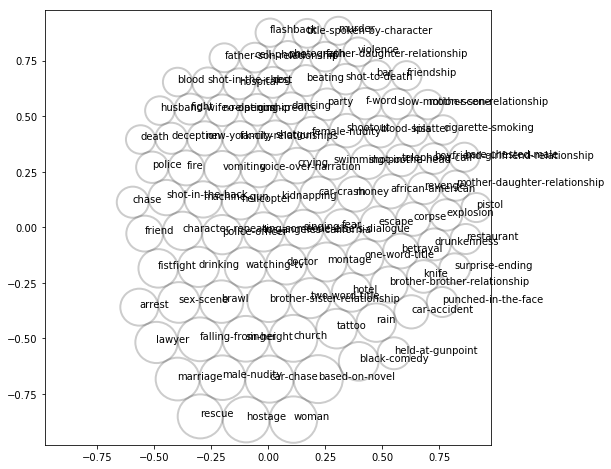

In [200]:
import circlify as circ
top100 = keyword_frequency.head(100)
circles = circ.circlify(list(top100['Frequency']))
circ.bubbles(circles, list(top100['Keyword']))


In [222]:
keys = ''
for index, row in top100.iterrows():
    a = ''
    for i in range(row['Frequency']):
        a += ' ' + row['Keyword']

    keys += ' ' + a
keys

"  murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder murder mur

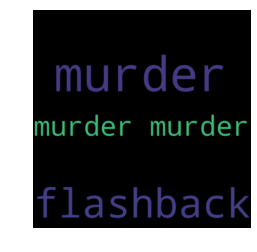

In [221]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=("murder murder flashback murder")
 

    
# Create the wordcloud object
wordcloud = WordCloud(width=960, height=960, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [226]:
list(required_data.loc[required_data['Title']=='Best of Enemies, The']['Keywords'])

[['ku-klux-klan',
  'durham-north-carolina',
  'activism',
  'civil-rights',
  '1970s',
  'race-relations',
  'based-on-true-story']]